# **R Laboratory Session 05**
### *Course:* Advanced Statistics for Physics Analysis, University of Padua, A.Y. 2021/22
### *Student:* Daniele Ninni
***
## **Table of Contents**
1) [**Exercise 1**](#sec1)
    - [1.A](#sec1.A)
    - [1.B](#sec1.B)
    - [1.C](#sec1.C)
2) [**Exercise 2**](#sec2)
3) [**Exercise 3**](#sec3)
    - [3.A](#sec3.A)
    - [3.B](#sec3.B)
***

In [1]:
# load packages
library(tidyverse)
library(patchwork)

# set plot options (global)
theme_set(theme_bw(base_size=8))
options(
    repr.plot.width=7,  # plotting area width in inches  (default:   7)
    repr.plot.height=4, # plotting area height in inches (default:   7)
    repr.plot.res=300   # PPI for rasterization          (default: 120)
)

# set random seed for reproducibility
set.seed(5)

-- Attaching packages ------------------------------------------------------------------------------ tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts --------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



<a id='sec1'></a>
## **Exercise 1**

The number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 \ s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3.

<a id='sec1.A'></a>
### **1.A** Supposing a uniform prior distribution for the parameter $\mu$:
- #### determine and draw the posterior distribution for $\mu$, given the data
- #### evaluate mean, median and variance, both analytically and numerically in R

<a id='sec1.B'></a>
### **1.B** Supposing a Jeffreys prior for the parameter $\mu$:
- #### determine and draw the posterior distribution for $\mu$, given the data
- #### evaluate mean, median and variance, both analytically and numerically in R

In [2]:
y <- c(4, 1, 3, 1, 3) # measurement dataset

# parameter 'mu'
mu.min    <- 0
mu.max    <- 10
mu.length <- 10^4
mu        <- seq(from=mu.min, to=mu.max, length=mu.length)

# Poisson likelihood
likelihood.alpha  <- sum(y) + 1
likelihood.lambda <- length(y)
likelihood        <- dgamma(x=mu, shape=likelihood.alpha, rate=likelihood.lambda)

# uniform prior
prior_unif.alpha  <- 1
prior_unif.lambda <- 0
prior_unif        <- rep(1, mu.length)

# Jeffreys prior
prior_jeffreys.alpha  <- 1 / 2
prior_jeffreys.lambda <- 0
prior_jeffreys        <- 1 / sqrt(mu)

# posterior (uniform prior)
posterior_unif.alpha  <- prior_unif.alpha + sum(y)
posterior_unif.lambda <- prior_unif.lambda + length(y)
posterior_unif        <- dgamma(x=mu, shape=posterior_unif.alpha, rate=posterior_unif.lambda)

# posterior (Jeffreys prior)
posterior_jeffreys.alpha  <- prior_jeffreys.alpha + sum(y)
posterior_jeffreys.lambda <- prior_jeffreys.lambda + length(y)
posterior_jeffreys        <- dgamma(x=mu, shape=posterior_jeffreys.alpha, rate=posterior_jeffreys.lambda)

# arrange results in tibble 'y.tbl'
y.tbl <- tibble(mu, 'likelihood_unif'=likelihood, 'likelihood_jeffreys'=likelihood, prior_unif, prior_jeffreys, posterior_unif, posterior_jeffreys) %>%
            pivot_longer(!mu, names_to=c('prob_type', 'prior_type'), names_sep='_', values_to='density')
y.tbl

mu,prob_type,prior_type,density
<dbl>,<chr>,<chr>,<dbl>
0.0000000,likelihood,unif,0.000000e+00
0.0000000,likelihood,jeffreys,0.000000e+00
0.0000000,prior,unif,1.000000e+00
0.0000000,prior,jeffreys,Inf
0.0000000,posterior,unif,0.000000e+00
0.0000000,posterior,jeffreys,0.000000e+00
0.0010001,likelihood,unif,2.538765e-36
0.0010001,likelihood,jeffreys,2.538765e-36
0.0010001,prior,unif,1.000000e+00


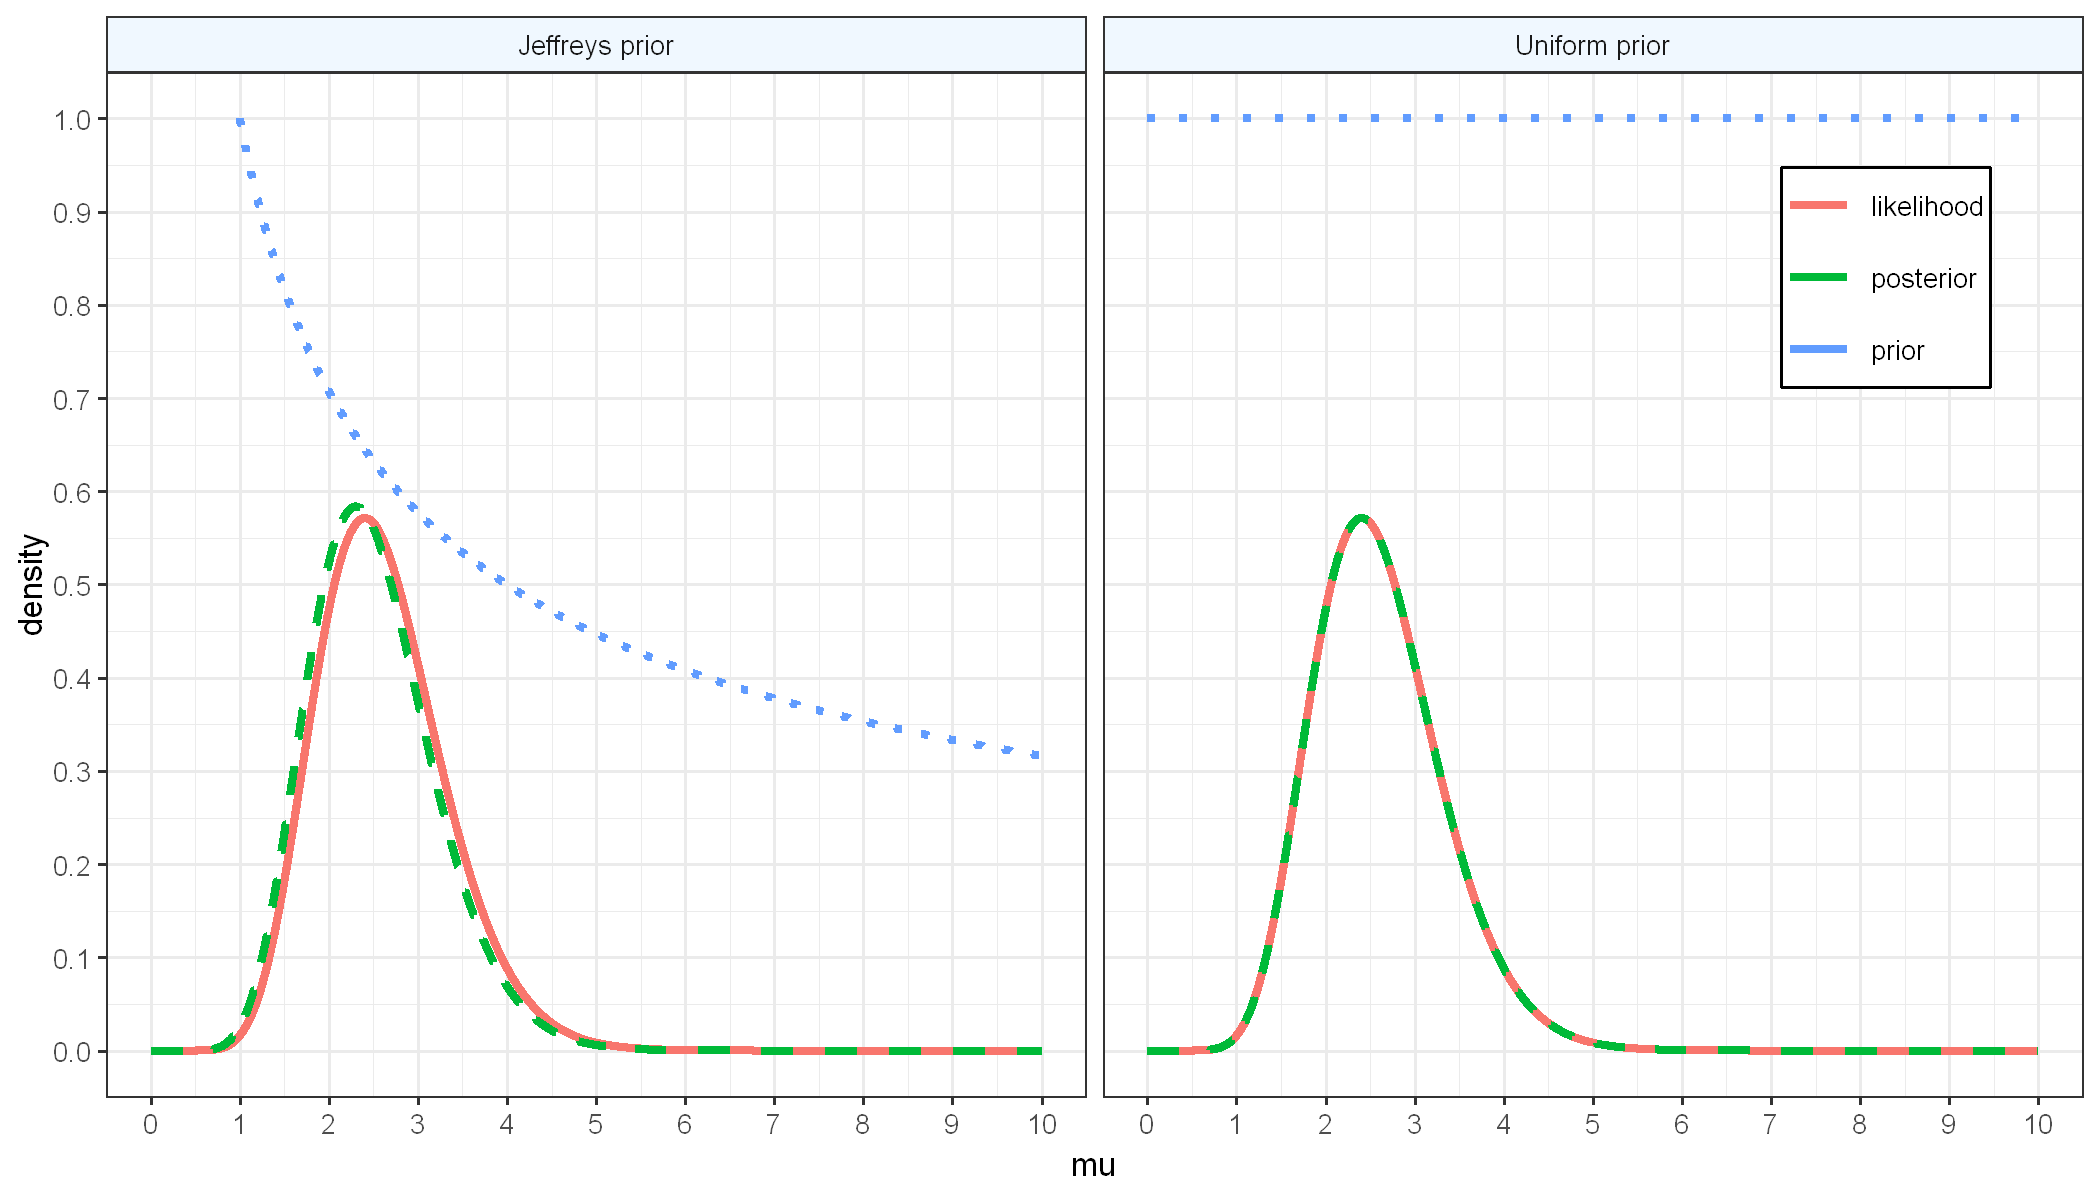

In [3]:
# plot probabilities
ggplot(data=y.tbl, aes(x=mu, y=density, group=prob_type, colour=prob_type, linetype=prob_type)) +
    geom_line(size=1) +
    scale_linetype_manual(values=c('prior'='dotted', 'likelihood'='solid', 'posterior'='dashed'), guide=guide_none()) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=11, limits=c(0,1)) +
    facet_wrap(vars(prior_type), labeller=as_labeller(c(unif='Uniform prior', jeffreys='Jeffreys prior'))) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3.5, r=6.5, b=.5, l=.5),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8),
        strip.background  = element_rect(fill="aliceblue"))

In [4]:
# evaluate statistical quantities analytically
# - mean
mean_unif.analytical     <- posterior_unif.alpha / posterior_unif.lambda
mean_jeffreys.analytical <- posterior_jeffreys.alpha / posterior_jeffreys.lambda
# - median
median_unif.analytical     <- qgamma(p=.5, shape=posterior_unif.alpha, rate=posterior_unif.lambda)
median_jeffreys.analytical <- qgamma(p=.5, shape=posterior_jeffreys.alpha, rate=posterior_jeffreys.lambda)
# - variance
variance_unif.analytical     <- posterior_unif.alpha / (posterior_unif.lambda^2)
variance_jeffreys.analytical <- posterior_jeffreys.alpha / (posterior_jeffreys.lambda^2)

# evaluate statistical quantities numerically
d.mu <- (mu.max - mu.min) / mu.length
# - mean
mean_unif.numerical     <- sum(mu * posterior_unif) * d.mu
mean_jeffreys.numerical <- sum(mu * posterior_jeffreys) * d.mu
# - median
median_unif.numerical     <- mu[which.min(abs(cumsum(posterior_unif)*d.mu - .5))]
median_jeffreys.numerical <- mu[which.min(abs(cumsum(posterior_jeffreys)*d.mu - .5))]
# - variance
variance_unif.numerical     <- (sum((mu^2)*posterior_unif) * d.mu) - ((sum(mu*posterior_unif) * d.mu)^2)
variance_jeffreys.numerical <- (sum((mu^2)*posterior_jeffreys) * d.mu) - ((sum(mu*posterior_jeffreys) * d.mu)^2)

# arrange results in tibble 'stats.tbl'
stats.tbl <- tibble(mean_unif.analytical, mean_jeffreys.analytical, median_unif.analytical, median_jeffreys.analytical, variance_unif.analytical, variance_jeffreys.analytical,
                    mean_unif.numerical,  mean_jeffreys.numerical,  median_unif.numerical,  median_jeffreys.numerical,  variance_unif.numerical,  variance_jeffreys.numerical) %>%
                        pivot_longer(everything(), names_to=c('value_type', 'prior_type', 'evaluation_type'), names_pattern='(.*)_(.*)\\.(.*)', values_to='value') %>%
                        pivot_wider(names_from=value_type, values_from=value) %>%
                        arrange(desc(prior_type))
stats.tbl

prior_type,evaluation_type,mean,median,variance
<chr>,<chr>,<dbl>,<dbl>,<dbl>
unif,analytical,2.60000,2.533646,0.5200000
unif,numerical,2.59974,2.533253,0.5206239
jeffreys,analytical,2.50000,2.433659,0.5000000
jeffreys,numerical,2.49975,2.433243,0.5005749


<a id='sec1.C'></a>
### **1.C** Evaluate a 95% credible interval for the results obtained with both priors, then compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [5]:
# estimate credible intervals
level <- .95
# - uniform prior
unif.lower <- qgamma(p=(1-level)/2, shape=posterior_unif.alpha, rate=posterior_unif.lambda)
unif.upper <- qgamma(p=(1+level)/2, shape=posterior_unif.alpha, rate=posterior_unif.lambda)
# - Jeffreys prior
jeffreys.lower <- qgamma(p=(1-level)/2, shape=posterior_jeffreys.alpha, rate=posterior_jeffreys.lambda)
jeffreys.upper <- qgamma(p=(1+level)/2, shape=posterior_jeffreys.alpha, rate=posterior_jeffreys.lambda)
# - normal approximation (uniform prior)
posterior_normUnif <- dnorm(x=mu, mean=mean_unif.analytical, sd=sqrt(variance_unif.analytical))
normUnif.lower     <- qnorm(p=(1-level)/2, mean=mean_unif.analytical, sd=sqrt(variance_unif.analytical))
normUnif.upper     <- qnorm(p=(1+level)/2, mean=mean_unif.analytical, sd=sqrt(variance_unif.analytical))
# - normal approximation (Jeffreys prior)
posterior_normJeffreys <- dnorm(x=mu, mean=mean_jeffreys.analytical, sd=sqrt(variance_jeffreys.analytical))
normJeffreys.lower     <- qnorm(p=(1-level)/2, mean=mean_jeffreys.analytical, sd=sqrt(variance_jeffreys.analytical))
normJeffreys.upper     <- qnorm(p=(1+level)/2, mean=mean_jeffreys.analytical, sd=sqrt(variance_jeffreys.analytical))

# arrange results in tibble 'cred_int.tbl'
cred_int.tbl <- tibble(unif.lower, unif.upper, jeffreys.lower, jeffreys.upper, normUnif.lower, normUnif.upper, normJeffreys.lower, normJeffreys.upper) %>%
                    pivot_longer(everything(), names_to=c('prior_type', 'end_type'), names_sep='\\.', values_to='value') %>%
                    pivot_wider(names_from=end_type, values_from=value) %>%
                    mutate(normal_approx=str_starts(prior_type, 'norm')) %>%
                    mutate(prior_type=str_to_lower(str_replace(prior_type, 'norm', ''))) %>%
                    arrange(desc(prior_type))
cred_int.tbl

prior_type,lower,upper,normal_approx
<chr>,<dbl>,<dbl>,<lgl>
unif,1.384390,4.192317,FALSE
unif,1.186650,4.013350,TRUE
jeffreys,1.311972,4.064647,FALSE
jeffreys,1.114096,3.885904,TRUE


In [6]:
# arrange results regarding position w.r.t. credible interval in tibble 'y_cred_int.tbl'
y_cred_int.tbl <- tibble(mu, posterior_unif, posterior_jeffreys, posterior_normUnif, posterior_normJeffreys) %>%
                    pivot_longer(!mu, names_to=c('prob_type', 'prior_type'), names_sep='_', values_to='density') %>%
                    mutate(normal_approx=str_starts(prior_type, 'norm')) %>%
                    mutate(prior_type=str_to_lower(str_replace(prior_type, 'norm', ''))) %>%
                    inner_join(cred_int.tbl, by=c('prior_type', 'normal_approx')) %>%
                    mutate(position=ifelse(mu < lower, 'before', ifelse(mu > upper, 'after', 'within'))) %>%
                    select(!c(lower, upper))
y_cred_int.tbl

mu,prob_type,prior_type,density,normal_approx,position
<dbl>,<chr>,<chr>,<dbl>,<lgl>,<chr>
0.0000000,posterior,unif,0.000000e+00,FALSE,before
0.0000000,posterior,jeffreys,0.000000e+00,FALSE,before
0.0000000,posterior,unif,8.317528e-04,TRUE,before
0.0000000,posterior,jeffreys,1.089142e-03,TRUE,before
0.0010001,posterior,unif,2.538765e-36,FALSE,before
0.0010001,posterior,jeffreys,1.256693e-34,FALSE,before
0.0010001,posterior,unif,8.359216e-04,TRUE,before
0.0010001,posterior,jeffreys,1.094601e-03,TRUE,before
0.0020002,posterior,unif,1.034691e-32,FALSE,before


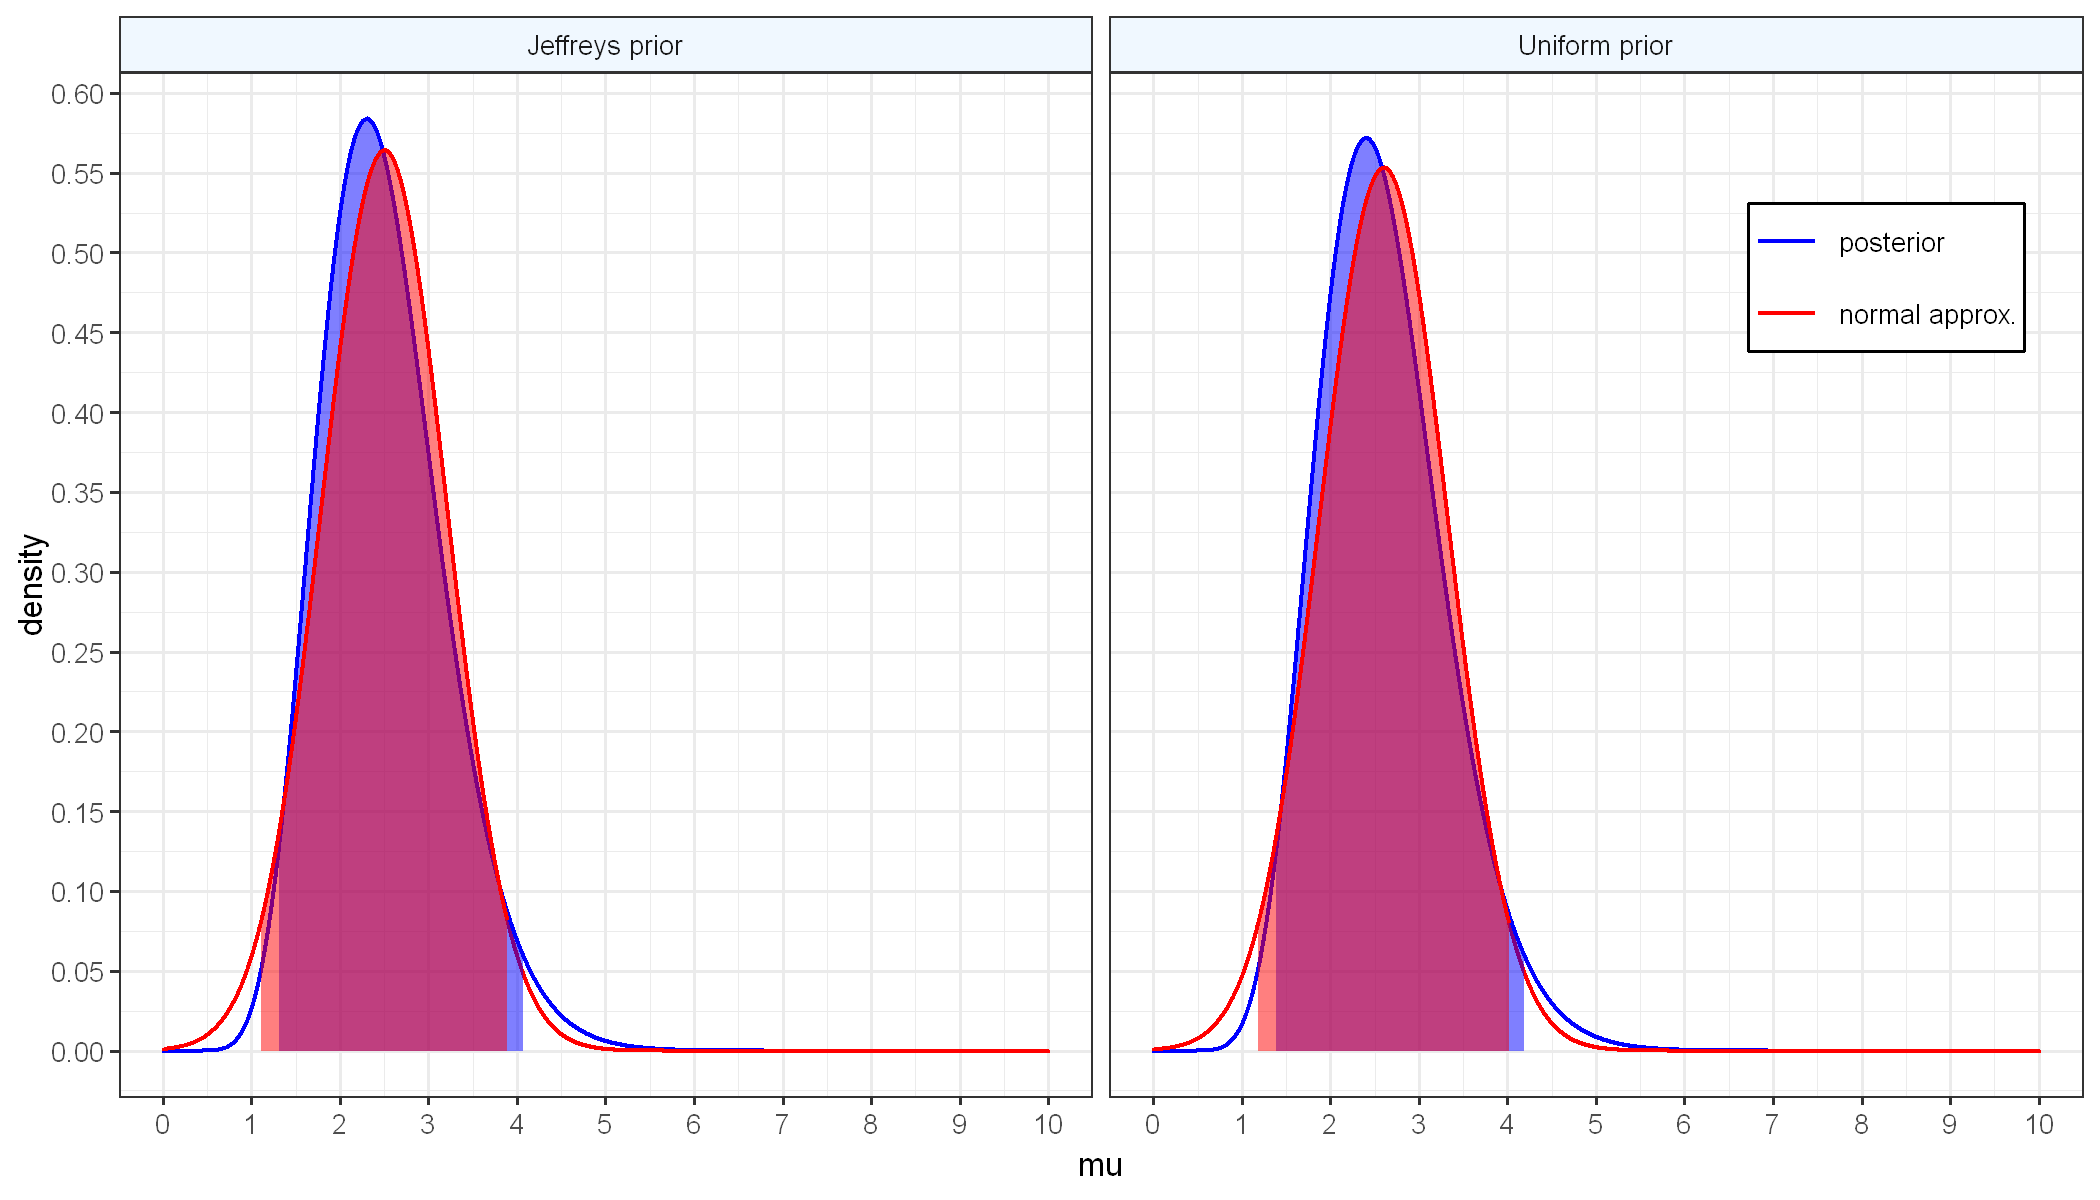

In [7]:
# plot credible intervals
ggplot(data=y_cred_int.tbl, aes(x=mu, y=density, alpha=position, colour=normal_approx, fill=paste(normal_approx, position))) +
    geom_area(position='identity', key_glyph=draw_key_path) +
    scale_colour_manual(values=c('blue', 'red'), labels=c('posterior', 'normal approx.')) +
    scale_fill_manual(values=c('white', 'white', 'blue', 'white', 'white', 'red'), guide=guide_none()) +
    scale_alpha_manual(values=c(0, 0, .5), guide=guide_none()) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=13) +
    facet_wrap(vars(prior_type), labeller=as_labeller(c(unif='Uniform prior', jeffreys='Jeffreys prior'))) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3.5, r=6.5, b=.5, l=.5),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8),
        strip.background  = element_rect(fill="aliceblue"))

<a id='sec2'></a>
## **Exercise 2**

Given the problem of the lighthouse discussed last week:
<center><img src='lighthouse.svg' width='1000'></center>

- ### Study the case in which both the position along the shore $(\alpha)$ and the distance out at sea $(\beta)$ are unknown

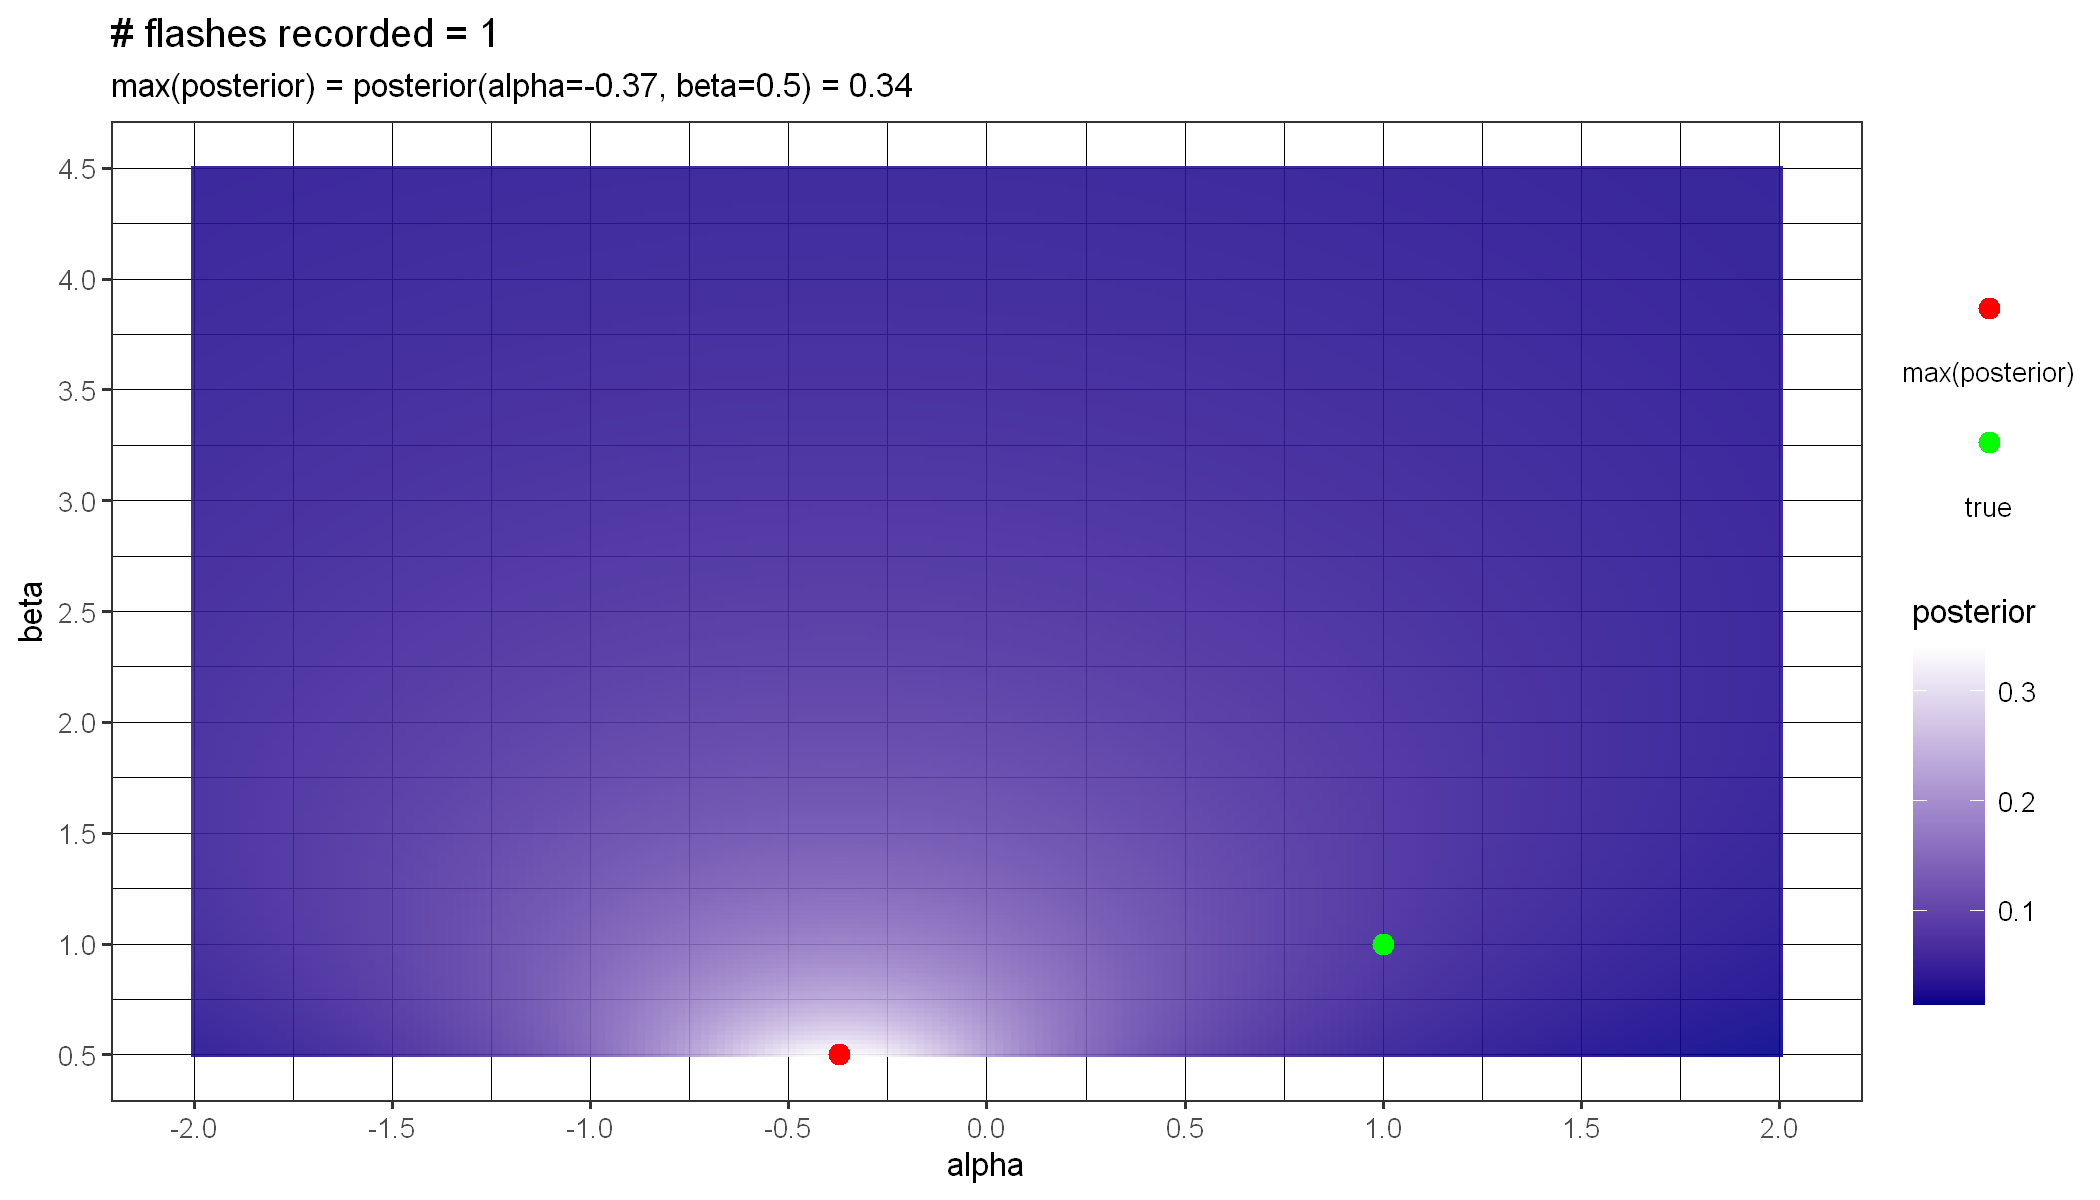

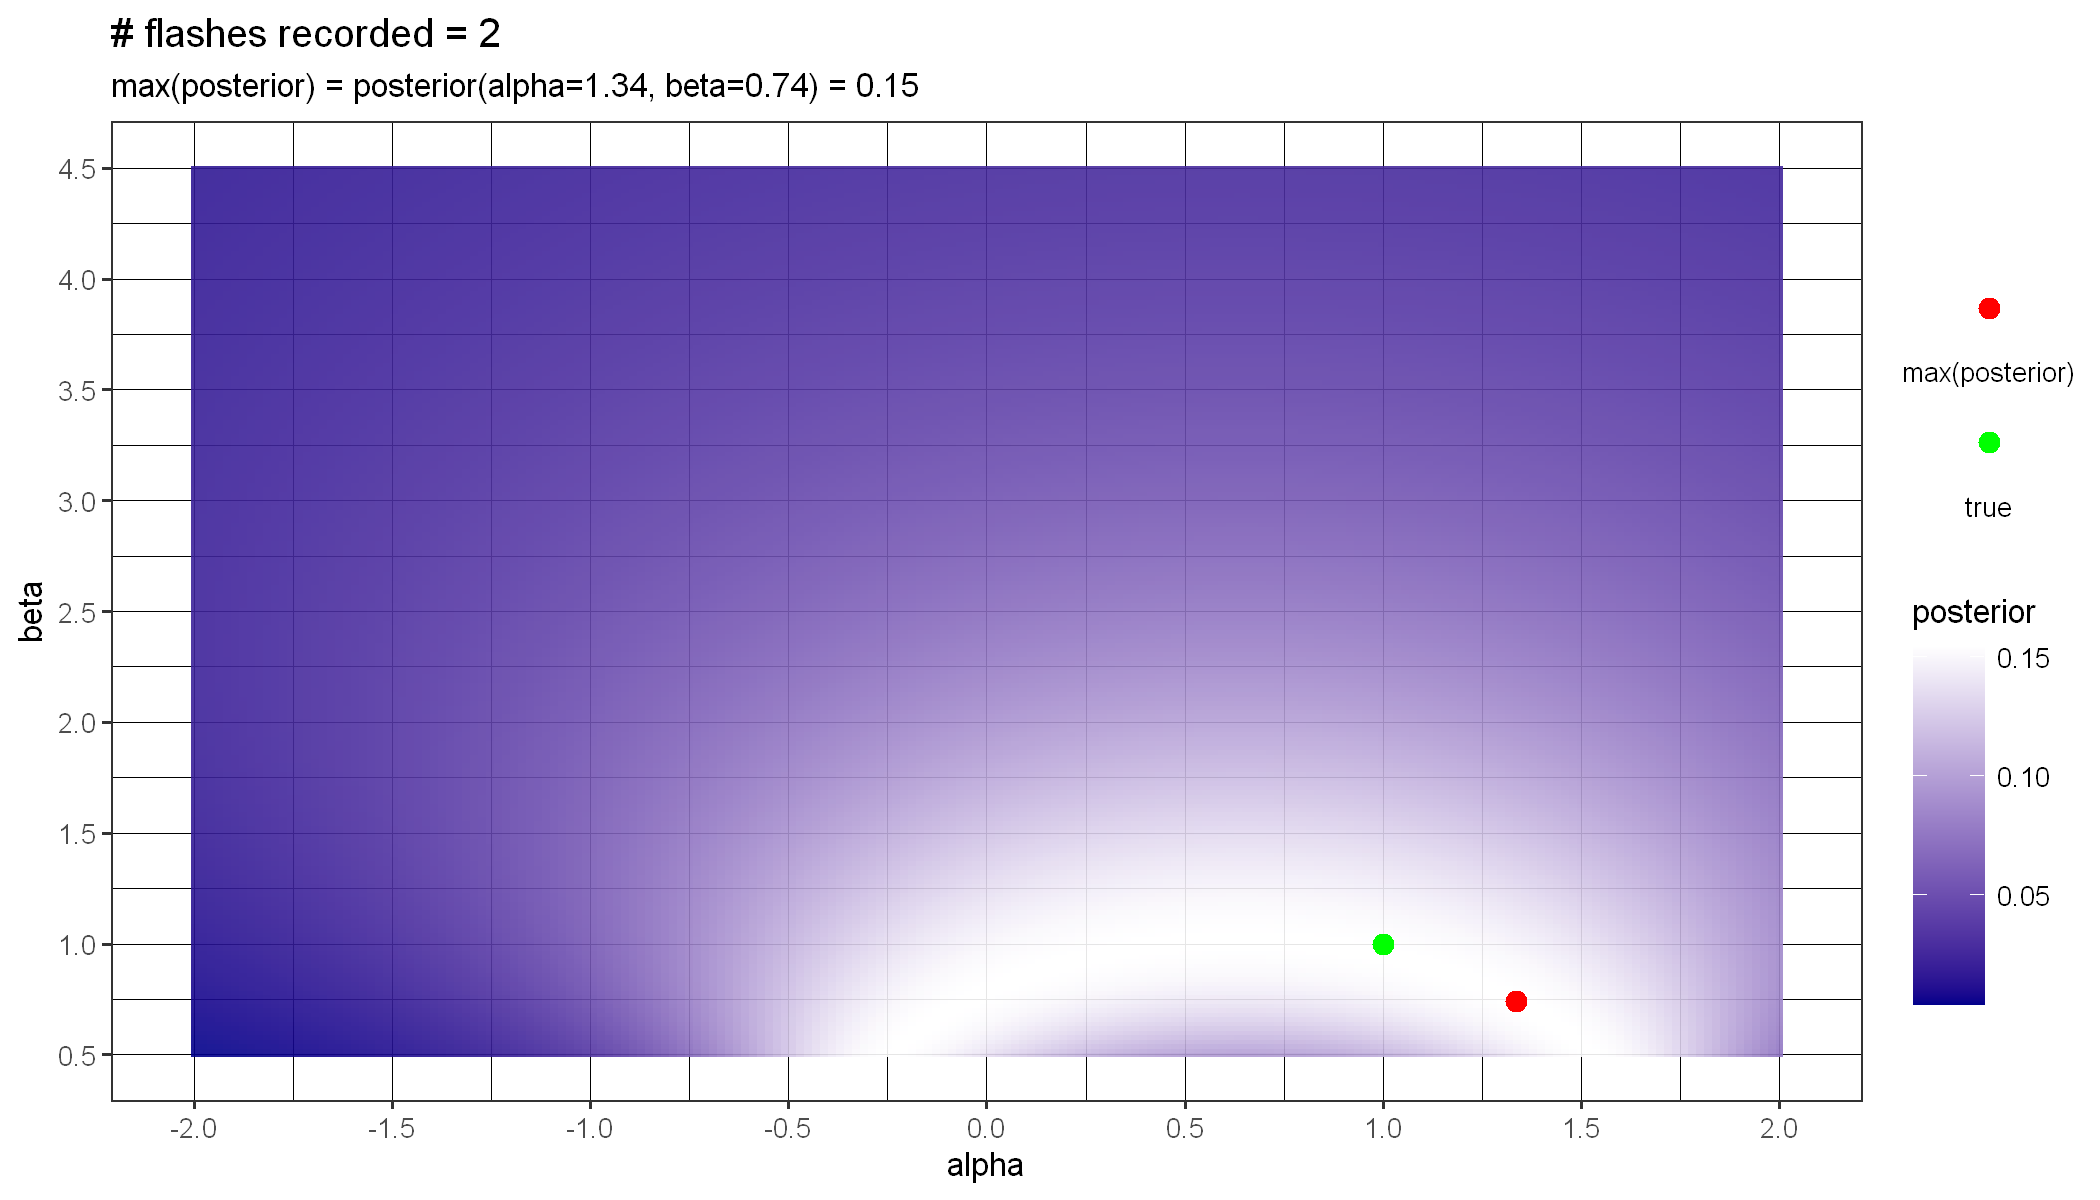

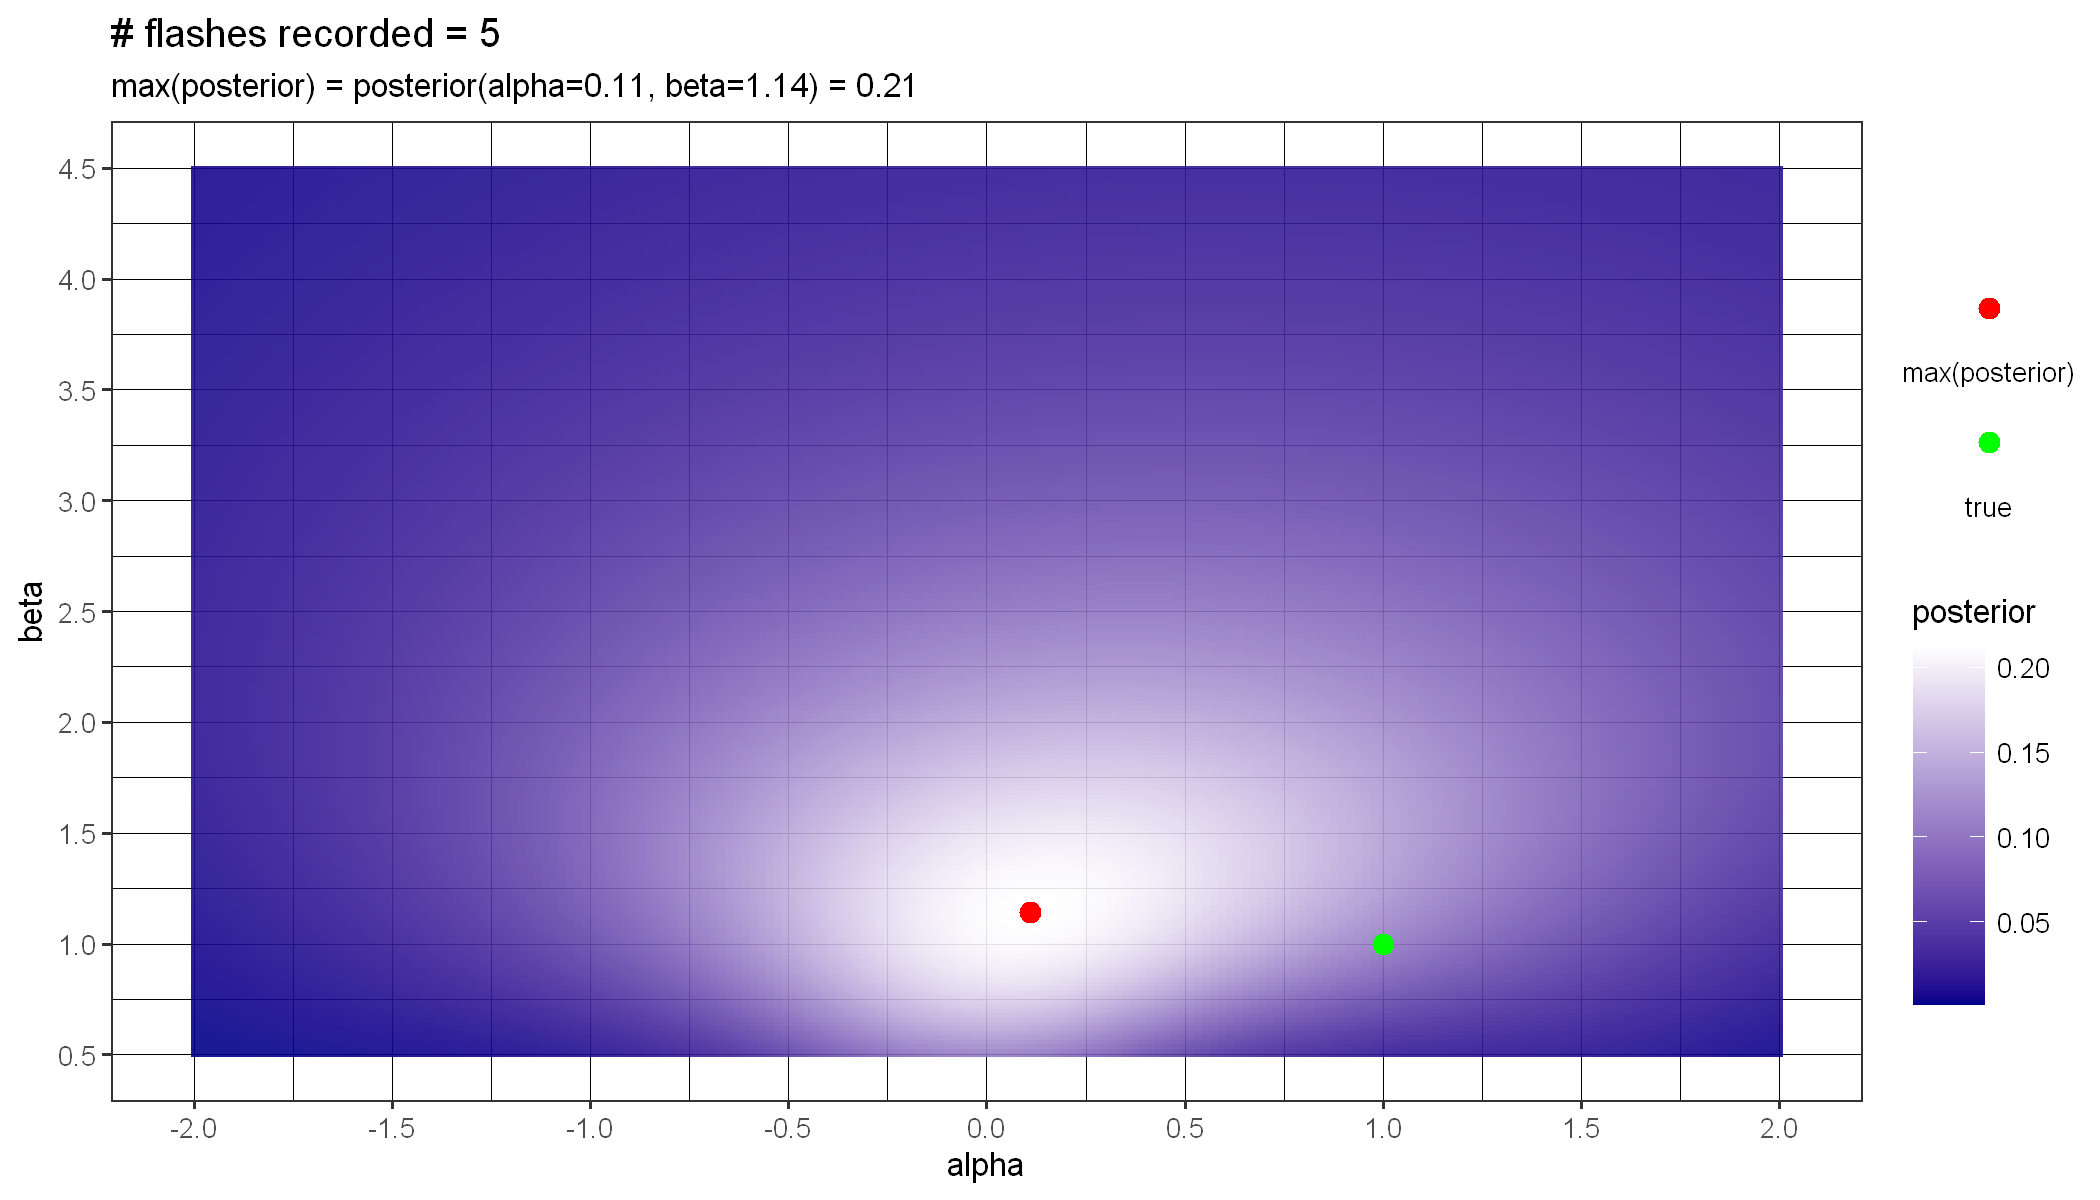

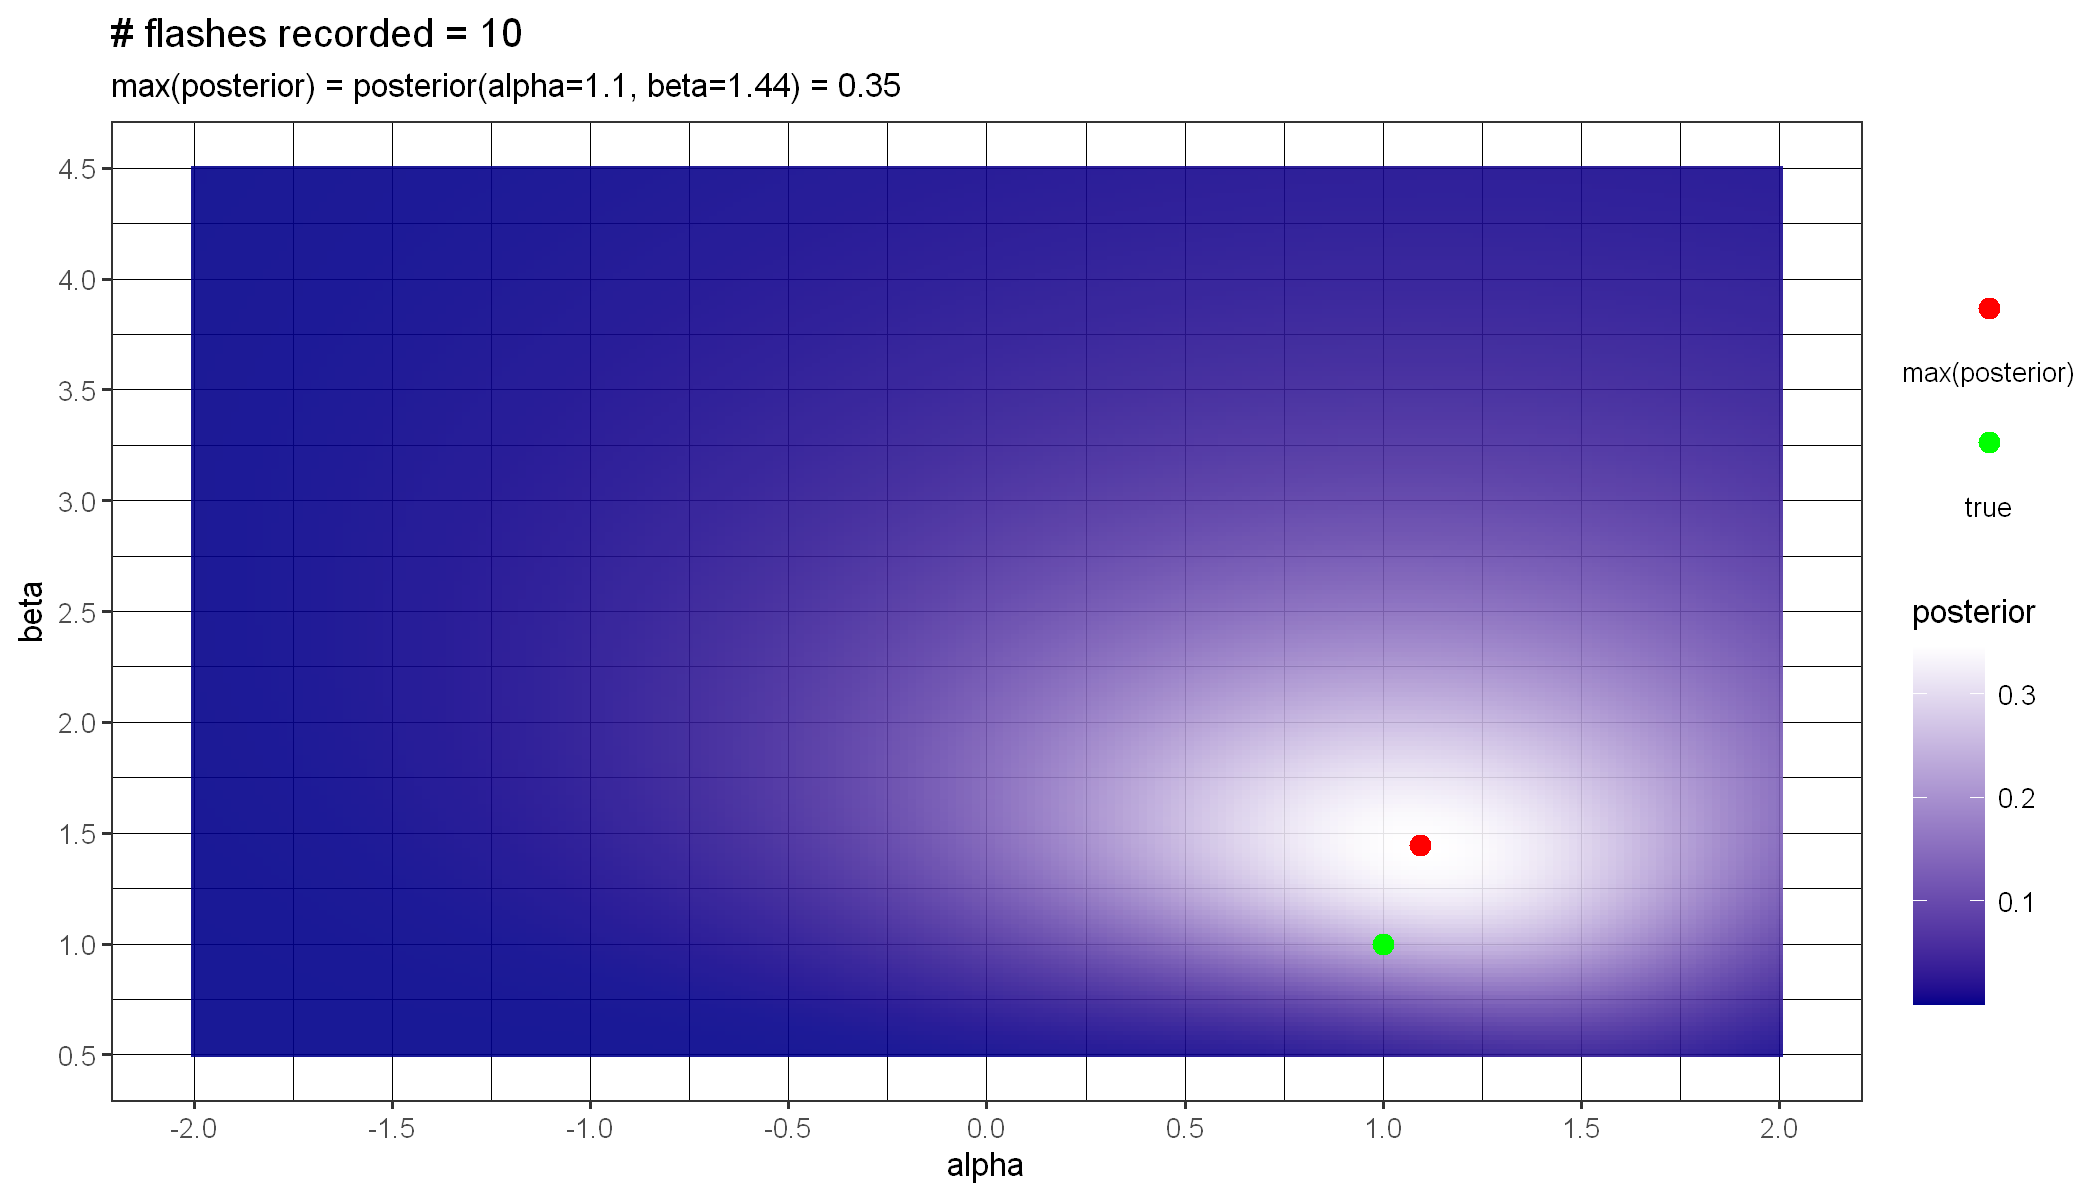

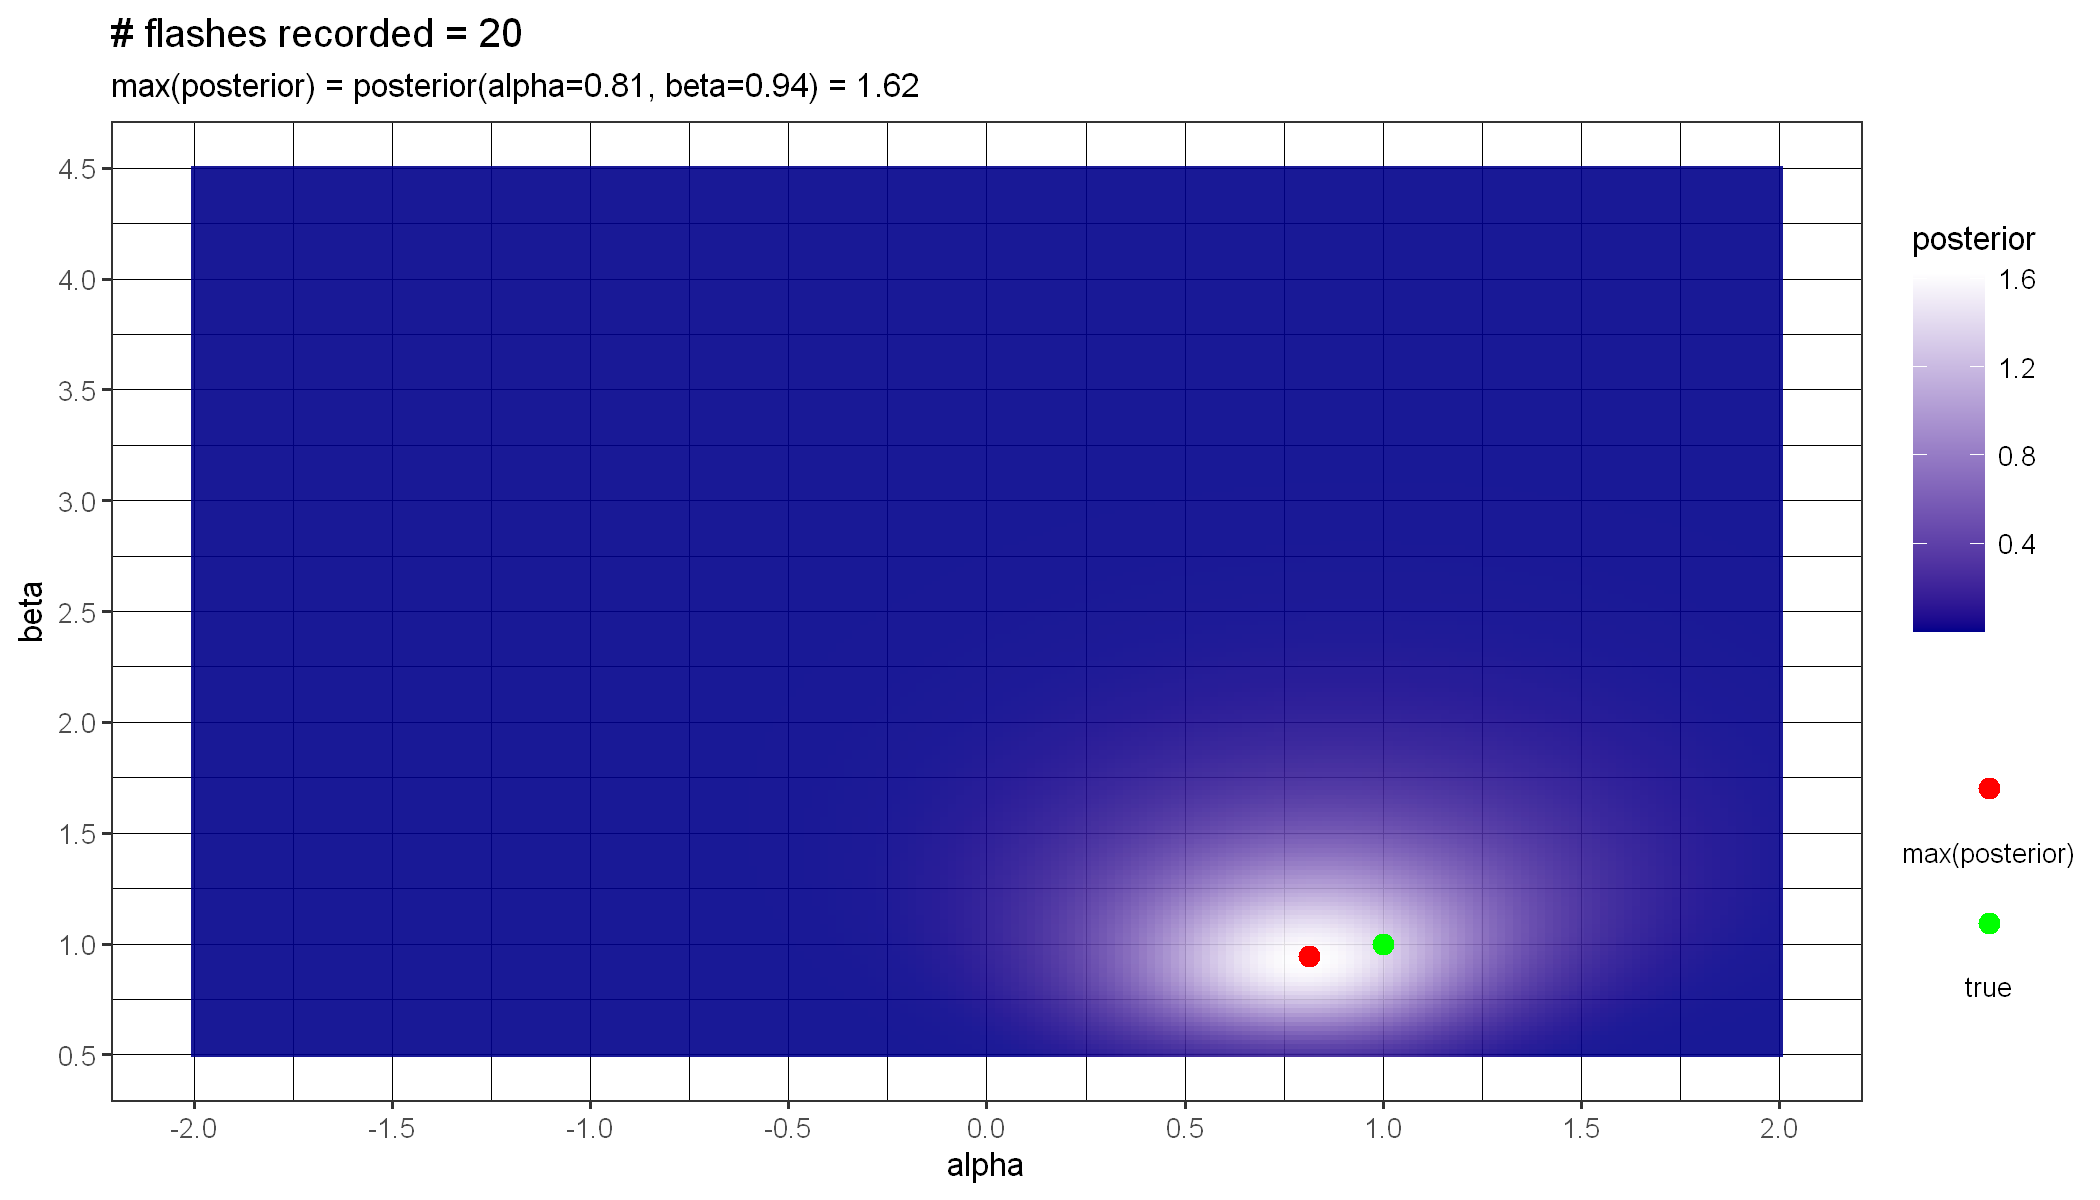

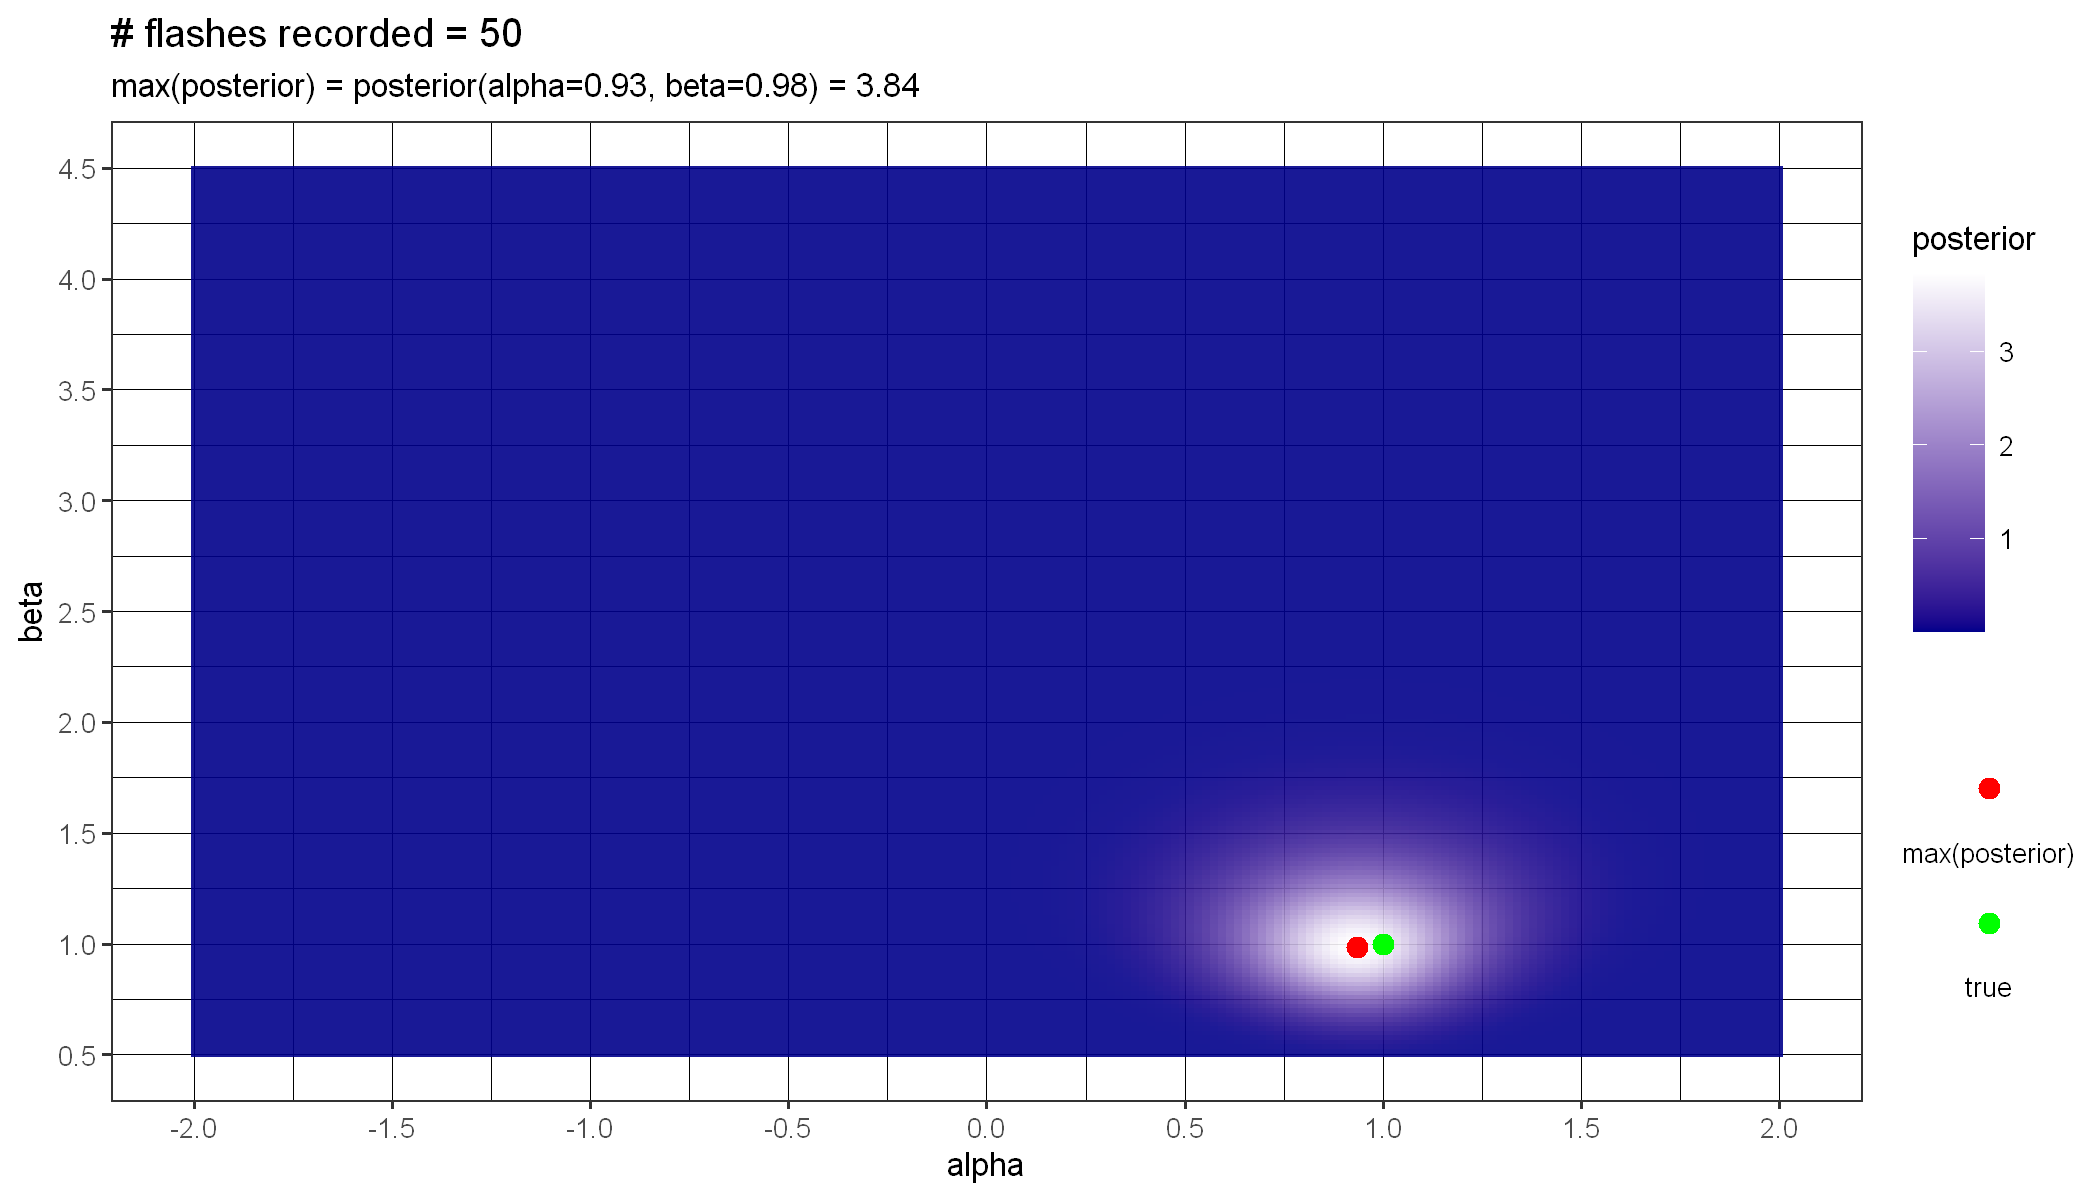

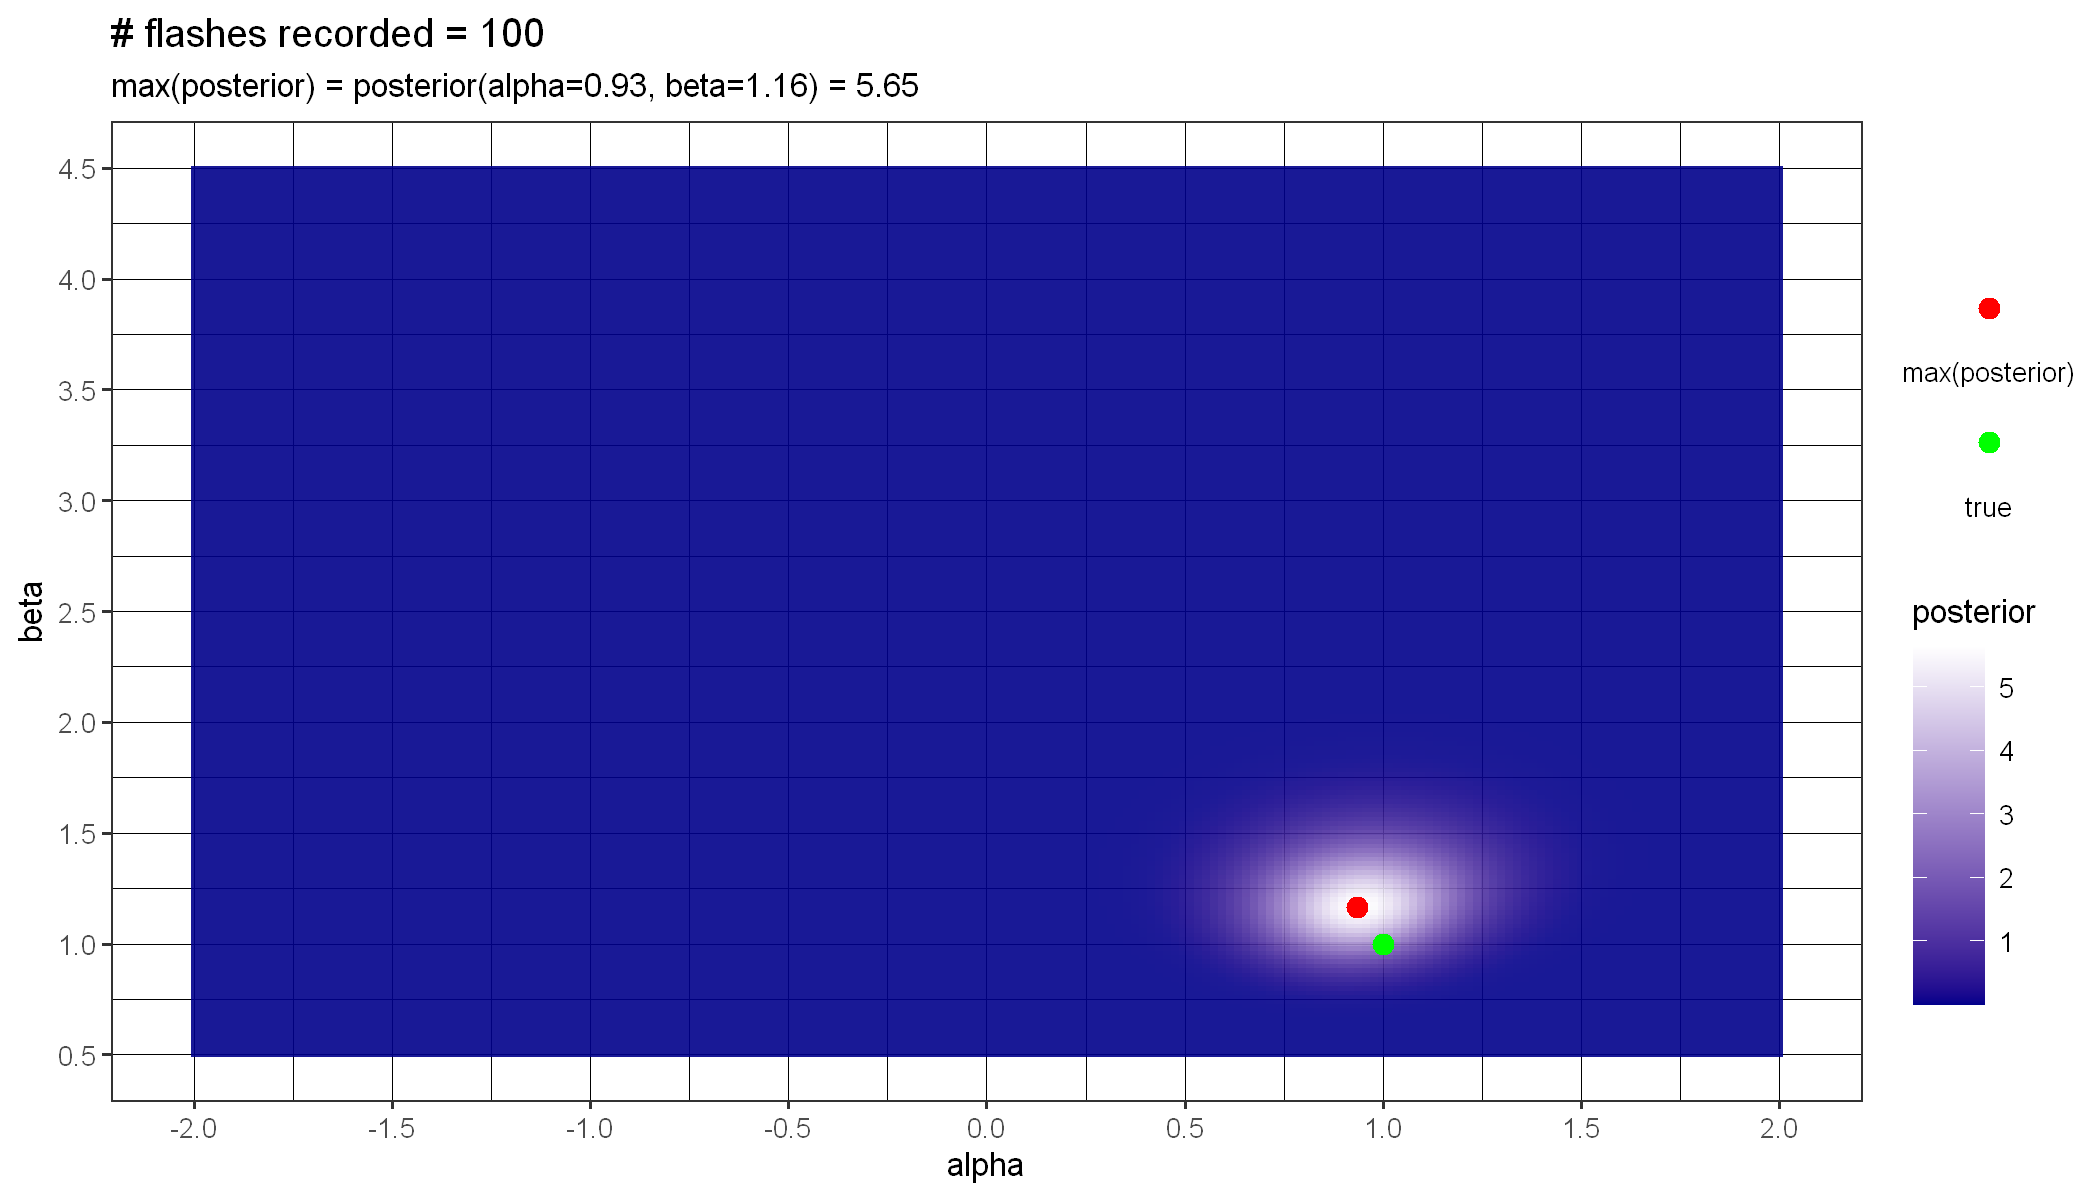

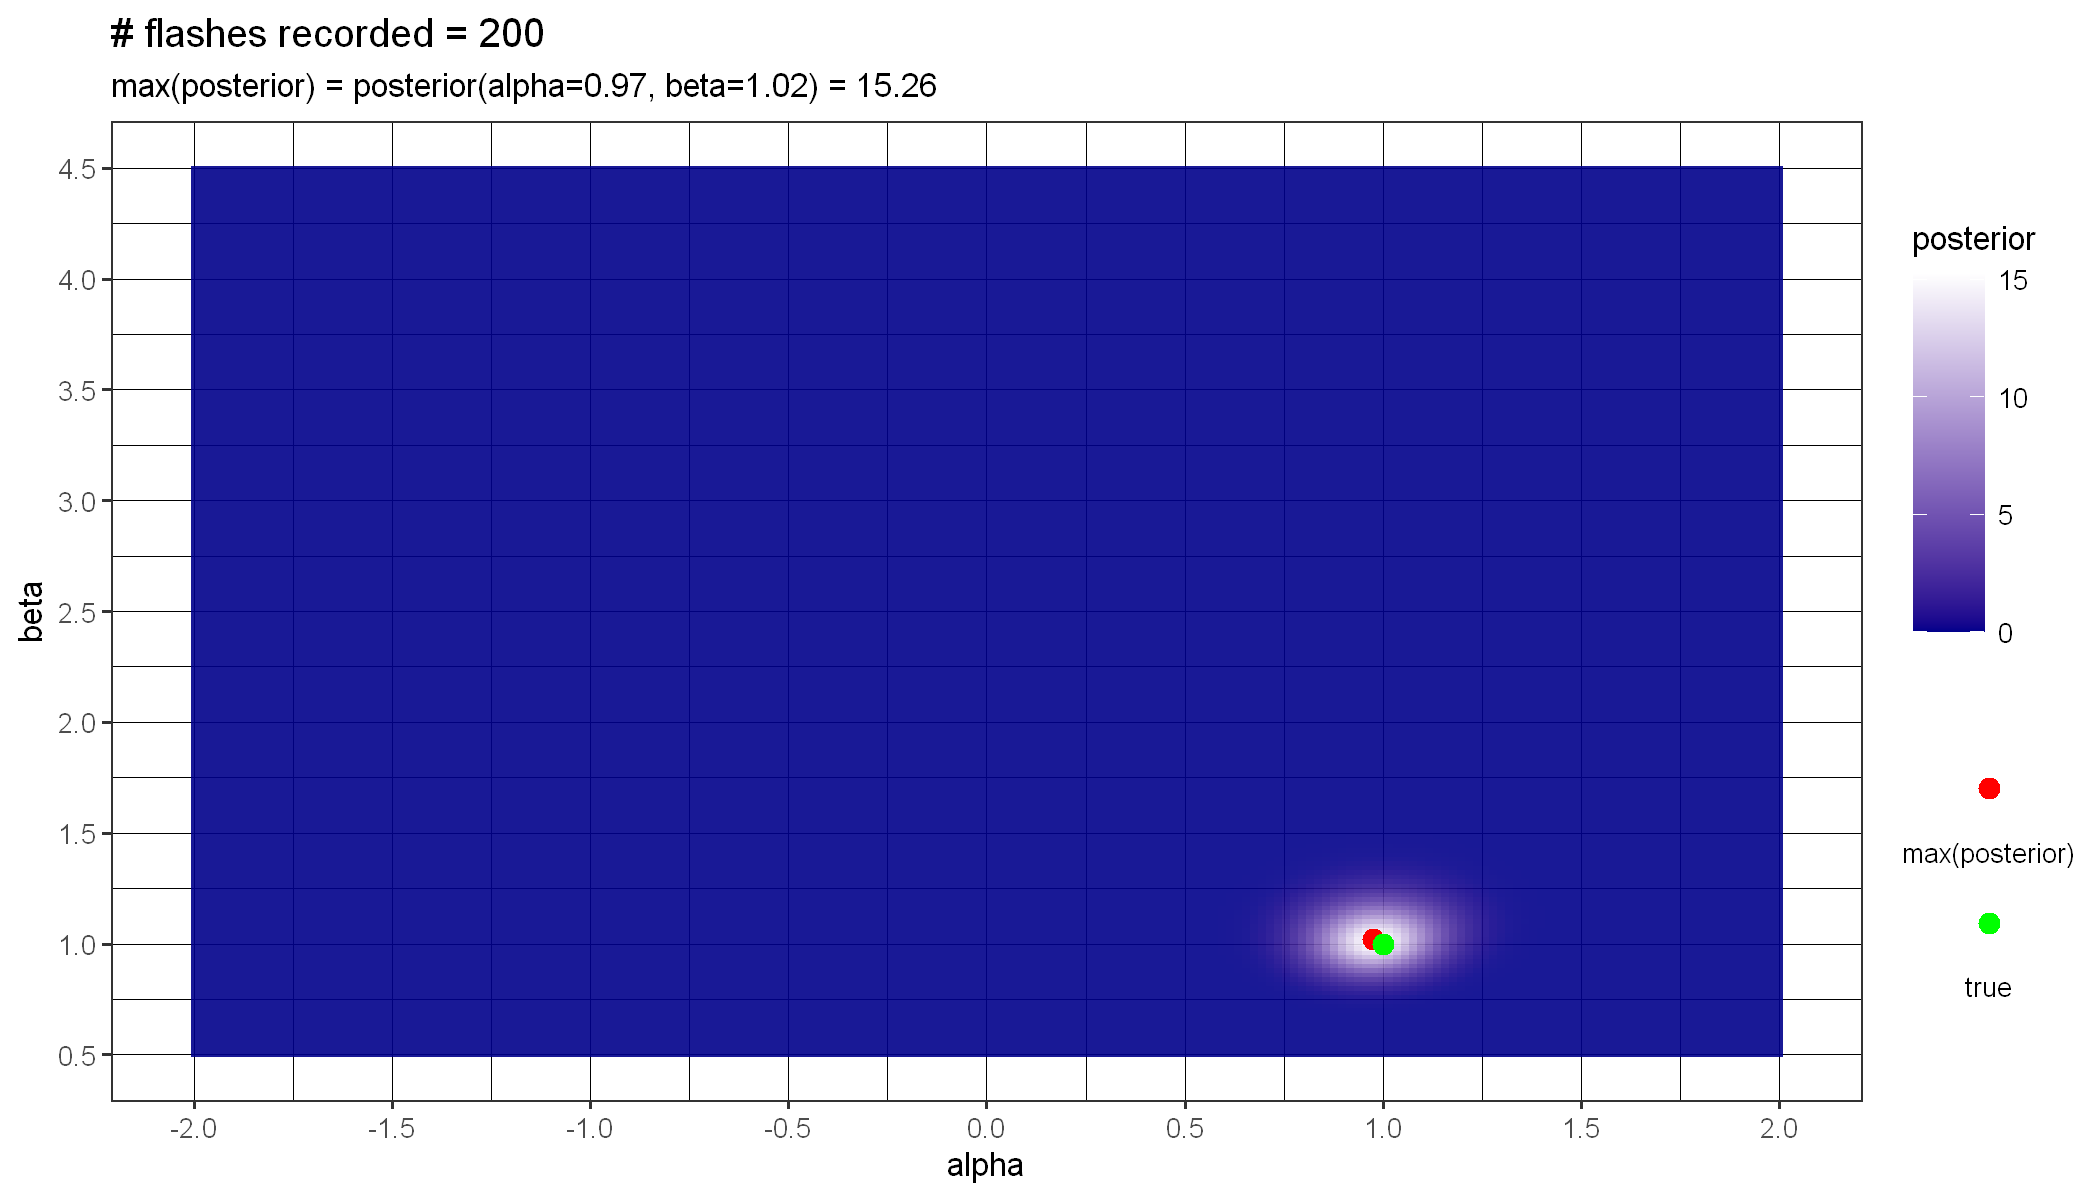

In [8]:
n_flashes <- c(1, 2, 5, 10, 20, 50, 100, 200) # number of flashes recorded

# parameter 'alpha'
alpha.true   <- 1
alpha.min    <- -2
alpha.max    <- 2
alpha.length <- 200
d.alpha      <- (alpha.max - alpha.min) / alpha.length
alpha        <- seq(from=alpha.min, to=alpha.max, length=alpha.length)

# parameter 'beta'
beta.true   <- 1
beta.min    <- 0.5
beta.max    <- 4.5
beta.length <- 200
d.beta      <- (beta.max - beta.min) / beta.length
beta        <- seq(from=beta.min, to=beta.max, length=beta.length)

# generate emission angles and recorded positions
theta <- runif(n=max(n_flashes), min=-pi/2, max=pi/2)
x     <- alpha.true + (beta.true * tan(theta))

for (n in n_flashes) {

    # compute posterior
    posterior <- c()
    for (a in alpha) for (b in beta) {posterior <- c(posterior, prod(dcauchy(x[1:n], location=a, scale=b)))}
    posterior     <- posterior / (d.alpha * d.beta * sum(posterior))
    posterior.tbl <- tibble('alpha'=rep(alpha, each=beta.length), 'beta'=rep(beta, times=alpha.length), 'posterior'=posterior)
    posterior.max <- posterior.tbl %>% filter(posterior == max(posterior))

    # plot posterior
    p <- ggplot() +
            geom_raster(data=posterior.tbl, aes(x=alpha, y=beta, fill=posterior), alpha=.9) +
            geom_point(data=posterior.max %>% add_row(alpha=alpha.true, beta=beta.true, posterior=NA) %>% mutate(type=c('max(posterior)', 'true')), aes(x=alpha, y=beta, colour=type), size=2) +
            scale_color_manual(name='', values=c('max(posterior)'='red', 'true'='green'), guide=guide_legend(label.position='bottom')) +
            scale_fill_gradient(low='darkblue', high='white') +
            scale_x_continuous(n.breaks=9) +
            scale_y_continuous(n.breaks=9) +
            theme(panel.grid=element_line(colour='black', size=.1)) +
            labs(title=str_glue('# flashes recorded = {n}'),
                 subtitle=str_glue('max(posterior) = posterior(alpha={round(posterior.max$alpha, 2)}, beta={round(posterior.max$beta, 2)}) = {round(posterior.max$posterior, 2)}'))
    print(p)

}

<a id='sec3'></a>
## **Exercise 3**

Given the Signal over Background example discussed last week, analyze and discuss the following cases:

<a id='sec3.A'></a>
### **3.A** Vary the sampling resolution used to generate the data, keeping the same sampling range

$\texttt{xdat <- seq(from=-7*w, to=7*w, by=0.5*w)}$

- #### change the resolution $w = \{0.15,\ 0.25,\ 1,\ 2,\ 3\}$
- #### check the effect on the results

In [9]:
# generative model
signal <- function(x, A, B, x0, w, Delta.t) {Delta.t * (A * exp(-((x-x0)^2) / (2*w^2)) + B)}

# log(posterior)
log.posterior <- function(s.counts, x, A, B, x0, w, Delta.t) {ifelse(A < 0 || B < 0, -Inf, sum(dpois(x=s.counts, lambda=signal(x, A, B, x0, w, Delta.t), log=T)))}

# model parameters
A.true  <- 2 # signal amplitude
B.true  <- 1 # background amplitude
x0      <- 0 # signal peak
w       <- 1 # signal width
Delta.t <- 5 # exposure time

# sampling grid for computing posterior
# - A
A.lim    <- c(0, 4)
A.length <- 200
d.A      <- diff(A.lim) / A.length
A        <- seq(from=A.lim[1], to=A.lim[2], length=A.length)
# - B
B.lim    <- c(0.5, 1.5)
B.length <- 200
d.B      <- diff(B.lim) / B.length
B        <- seq(from=B.lim[1], to=B.lim[2], length=B.length)

In [10]:
# define function that analyzes dependence on a single parameter to be chosen between 'sampling resolution' and 'signal-to-noise ratio'
analyze.dependence <- function(param_name, param_values, seed=205) {

    for (r in param_values) {

        # set random seed for reproducibility
        set.seed(seed)

        if (param_name == 'sampling_resolution') {

            # sampling resolution
            x.res <- r

            # sampling range
            x.min <- -7 * max(param_values)
            x.max <- 7 * max(param_values)

            # SNR (signal-to-noise ratio)
            SNR   <- A.true / B.true
            
        } else {

            # sampling resolution
            x.res <- 0.5 * w

            # sampling range
            x.min <- -7 * w
            x.max <- 7 * w

            # SNR (signal-to-noise ratio)
            SNR   <- r           

        }

        # generate true signal and observed counts
        x        <- seq(from=x.min, to=x.max, by=x.res)
        s.true   <- signal(x, SNR*B.true, B.true, x0, w, Delta.t)
        s.counts <- rpois(n=length(s.true), lambda=s.true)
        x.plot   <- seq(from=x.min, to=x.max, by=0.1*x.res)
        s.plot   <- signal(x.plot, SNR*B.true, B.true, x0, w, Delta.t)

        # plot of true signal and observed counts
        p1 <- ggplot() +
                geom_step(aes(x=x-.25, y=s.counts), colour='red') +
                geom_line(aes(x=x.plot, y=s.plot), colour='black') +
                xlab('x') +
                ylab('Signal+Background counts')

        # compute log(unnormalized posterior), z = ln(P(A,B|D)), on sampling grid
        z <- c()
        for (a in A) for (b in B) {z <- c(z, log.posterior(s.counts, x, a, b, x0, w, Delta.t))}
        z <- z - max(z) # set maximum to zero

        # compute unnormalized posterior
        posterior.tbl <- tibble('A'=rep(A, each=B.length), 'B'=rep(B, times=A.length), 'posterior'=exp(z))
        posterior.max <- posterior.tbl %>% filter(posterior == max(posterior))

        # plot of unnormalized posterior
        p2 <- ggplot() +
                geom_raster(data=posterior.tbl, aes(x=A, y=B, fill=posterior), alpha=.9, show.legend=F) +
                geom_point(data=posterior.max %>% add_row(A=SNR*B.true, B=B.true, posterior=NA) %>% mutate(type=c('max(posterior)', 'true')), aes(x=A, y=B, colour=type), size=1.5, show.legend=F) +
                scale_color_manual(values=c('max(posterior)'='red', 'true'='green')) +
                scale_fill_gradient(low='darkblue', high='white') +
                xlab('A (amplitude)') +
                ylab('B (background)') +
                theme(panel.grid=element_line(colour='black', size=.1))

        # compute normalized marginal posterior P(A|D) by summing over B
        A.posterior <- posterior.tbl %>%
                        group_by(A) %>%
                        summarise(marginal = sum(posterior)) %>%
                        mutate(marginal = marginal / (d.A * sum(marginal)))

        # compute normalized marginal posterior P(B|D) by summing over A
        B.posterior <- posterior.tbl %>%
                        group_by(B) %>%
                        summarise(marginal = sum(posterior)) %>%
                        mutate(marginal = marginal / (d.B * sum(marginal)))

        # compute normalized conditional posterior P(A|B,D) using true value of B
        A.posterior <- A.posterior %>%
                        mutate(conditional = exp(Vectorize(log.posterior, 'A')(s.counts, x, A, B.true, x0, w, Delta.t))) %>%
                        mutate(conditional = conditional / (d.A * sum(conditional)))

        # compute normalized conditional posterior P(B|A,D) using true value of A
        B.posterior <- B.posterior %>%
                        mutate(conditional = exp(Vectorize(log.posterior, 'B')(s.counts, x, SNR*B.true, B, x0, w, Delta.t))) %>%
                        mutate(conditional = conditional / (d.B * sum(conditional)))

        # compute mean of A and B
        A.mean <- d.A * sum(A * A.posterior$marginal)
        B.mean <- d.B * sum(B * B.posterior$marginal)

        # compute standard deviation of A and B
        A.sd <- sqrt(d.A * sum((A - A.mean)^2 * A.posterior$marginal))
        B.sd <- sqrt(d.B * sum((B - B.mean)^2 * B.posterior$marginal))

        # compute covariance of A and B
        posterior.tbl <- posterior.tbl %>% mutate(cov_terms = (A - A.mean) * (B - B.mean) * posterior)
        AB.cov        <- sum(posterior.tbl$cov_terms) / sum(posterior.tbl$posterior)

        # compute correlation between A and B
        AB.rho <- AB.cov / (A.sd * B.sd)

        # plot of P(A|D) and P(A|B,D)
        p3 <- ggplot(data=A.posterior %>% pivot_longer(!A, names_to='prob_type', values_to='prob'), aes(x=A, y=prob, linetype=prob_type)) +
                geom_line(show.legend=F) +
                geom_rect(aes(xmin=A.mean-A.sd, xmax=A.mean+A.sd, ymin=-Inf, ymax=Inf, fill='red'), alpha=.01, show.legend=F) +
                geom_vline(xintercept=SNR*B.true, colour='green', size=.8) +
                geom_vline(xintercept=A.mean, colour='red', size=.8) +
                scale_linetype_manual(values=c('marginal'='solid', 'conditional'='longdash')) +
                xlab('A (amplitude)') +
                ylab('P(A|D) and P(A|B,D)')

        # plot of P(B|D) and P(B|A,D)
        p4 <- ggplot(data=B.posterior %>% pivot_longer(!B, names_to='prob_type', values_to='prob'), aes(x=B, y=prob, linetype=prob_type)) +
                geom_line(show.legend=F) +
                geom_rect(aes(xmin=B.mean-B.sd, xmax=B.mean+B.sd, ymin=-Inf, ymax=Inf, fill='red'), alpha=.01, show.legend=F) +
                geom_vline(xintercept=B.true, colour='green', size=.8) +
                geom_vline(xintercept=B.mean, colour='red', size=.8) +
                scale_linetype_manual(values=c('marginal'='solid', 'conditional'='longdash')) +
                xlab('B (background)') +
                ylab('P(B|D) and P(B|A,D)')

        # print plots
        p <- p1 + p2 + p3 + p4 +
                plot_layout(ncol=4) +
                plot_annotation(title=ifelse(param_name == 'sampling_resolution', str_glue('Sampling resolution = {r}'), str_glue('Signal-to-noise ratio = {r}')),
                                subtitle=str_glue('A = {round(A.mean, 4)} +/- {round(A.sd, 4)}    ,    B = {round(B.mean, 4)} +/- {round(B.sd, 4)}    ,    corr(A,B) = {round(AB.rho, 4)}'),
                                theme=theme(plot.title=element_text(colour='blue', size=12, hjust=.5), plot.subtitle=element_text(colour='black', hjust=.5)))
        options(repr.plot.width=11, repr.plot.height=3)
        print(p)

    }

}

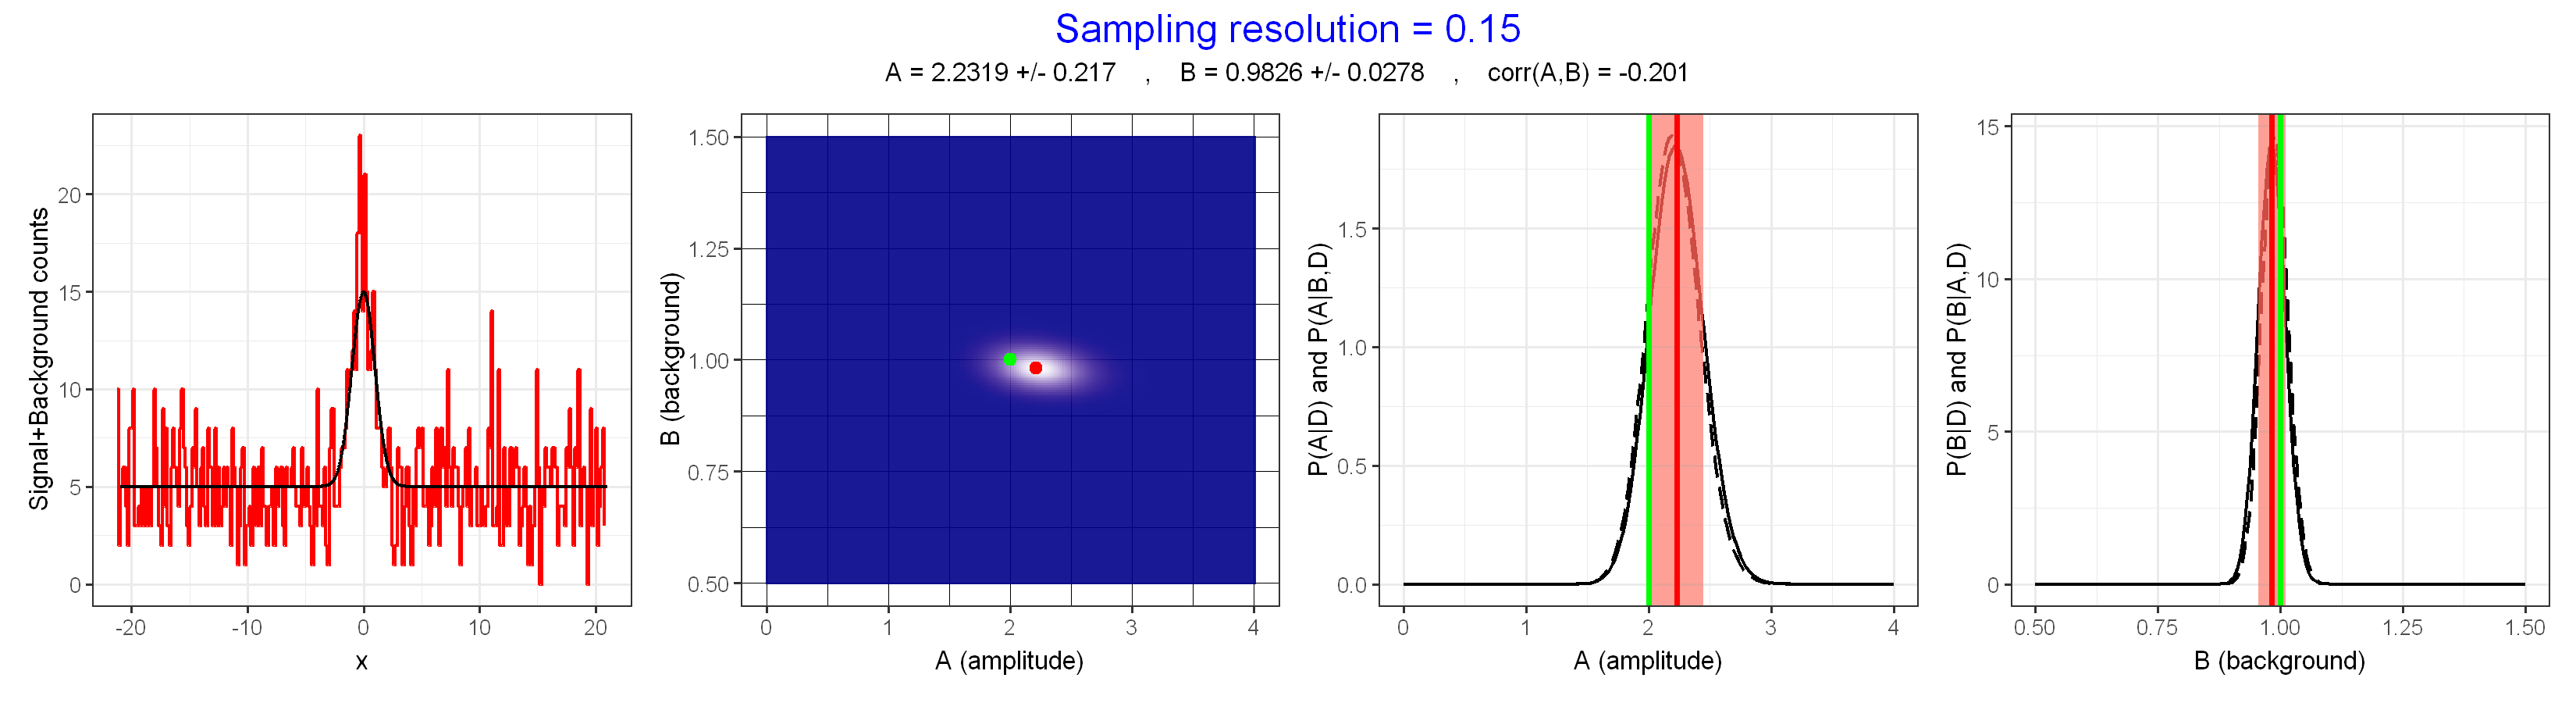

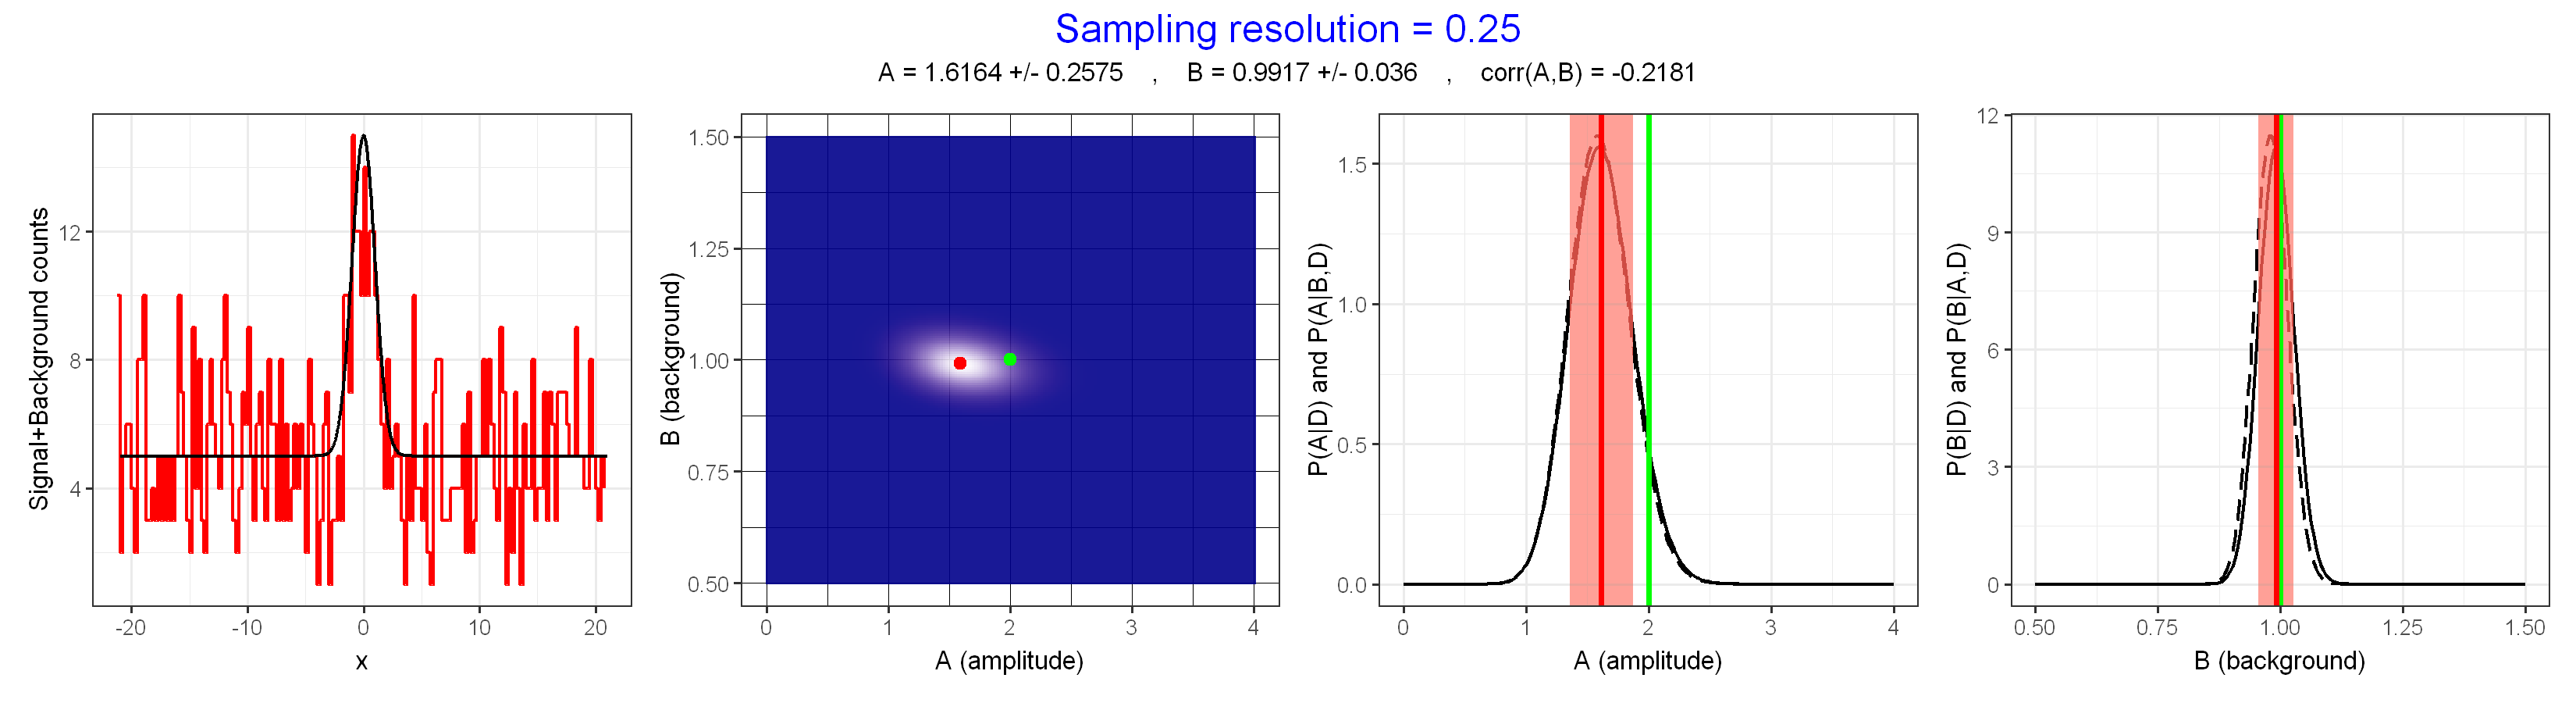

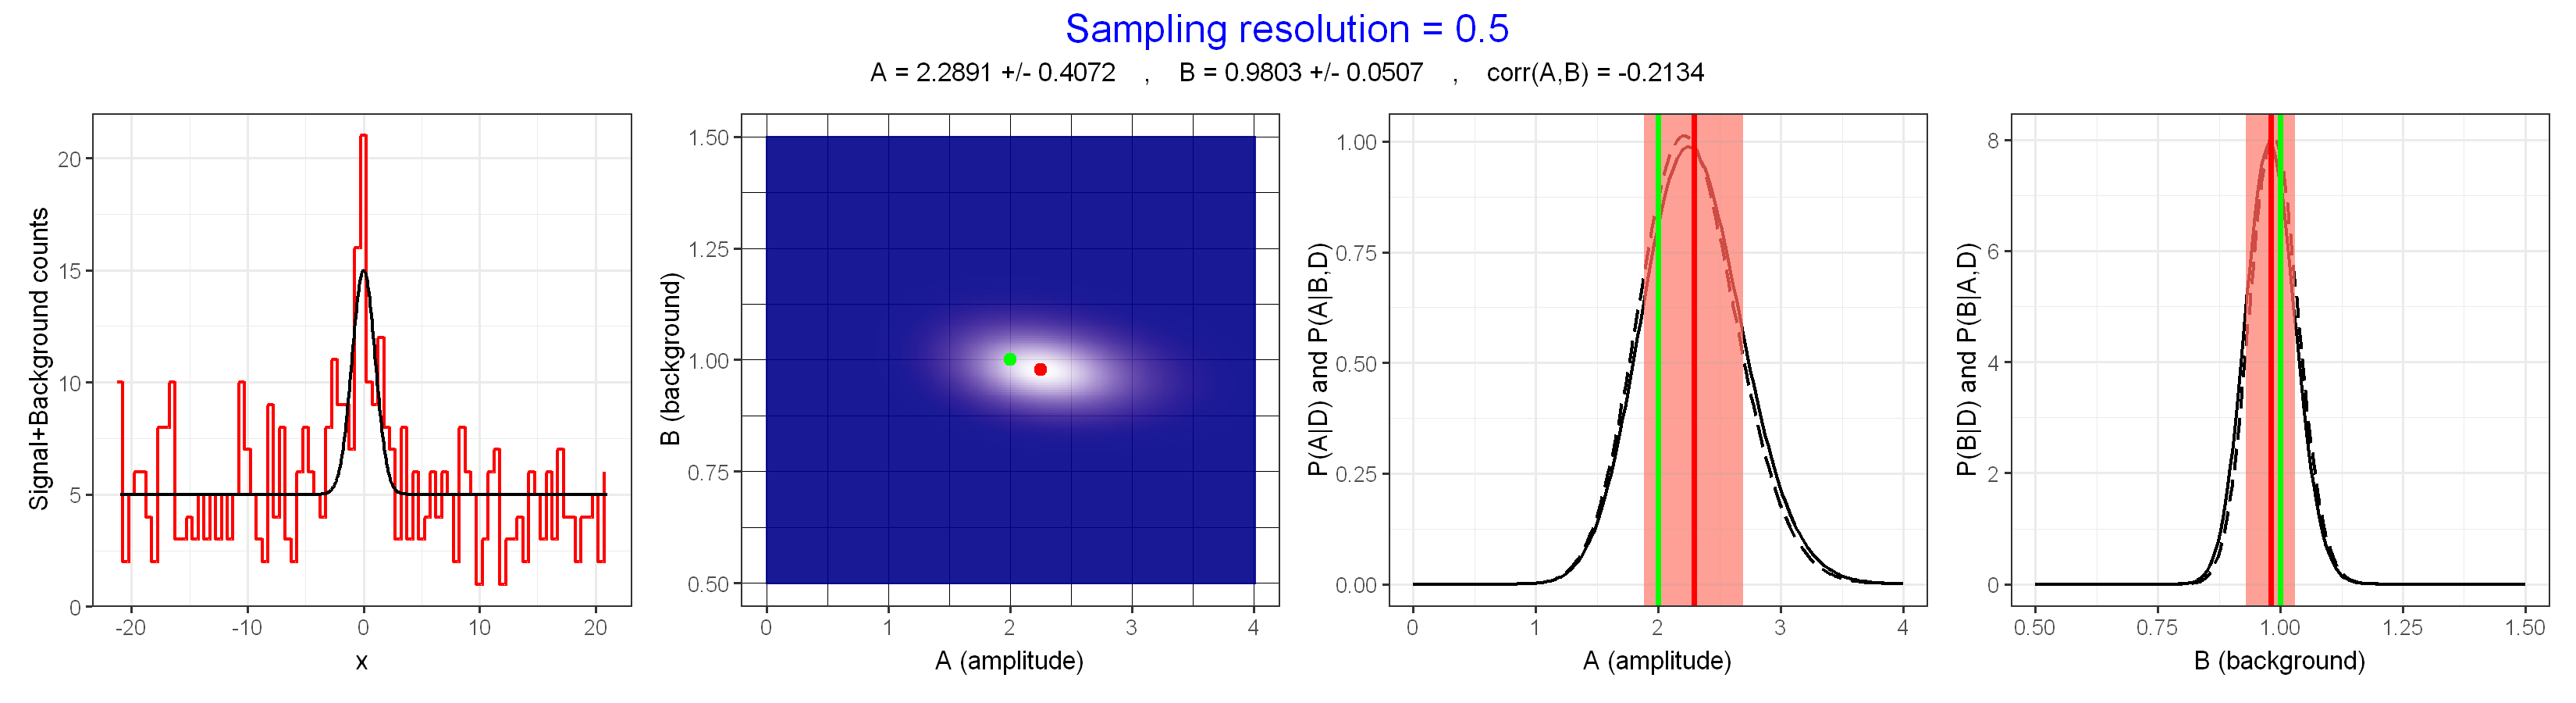

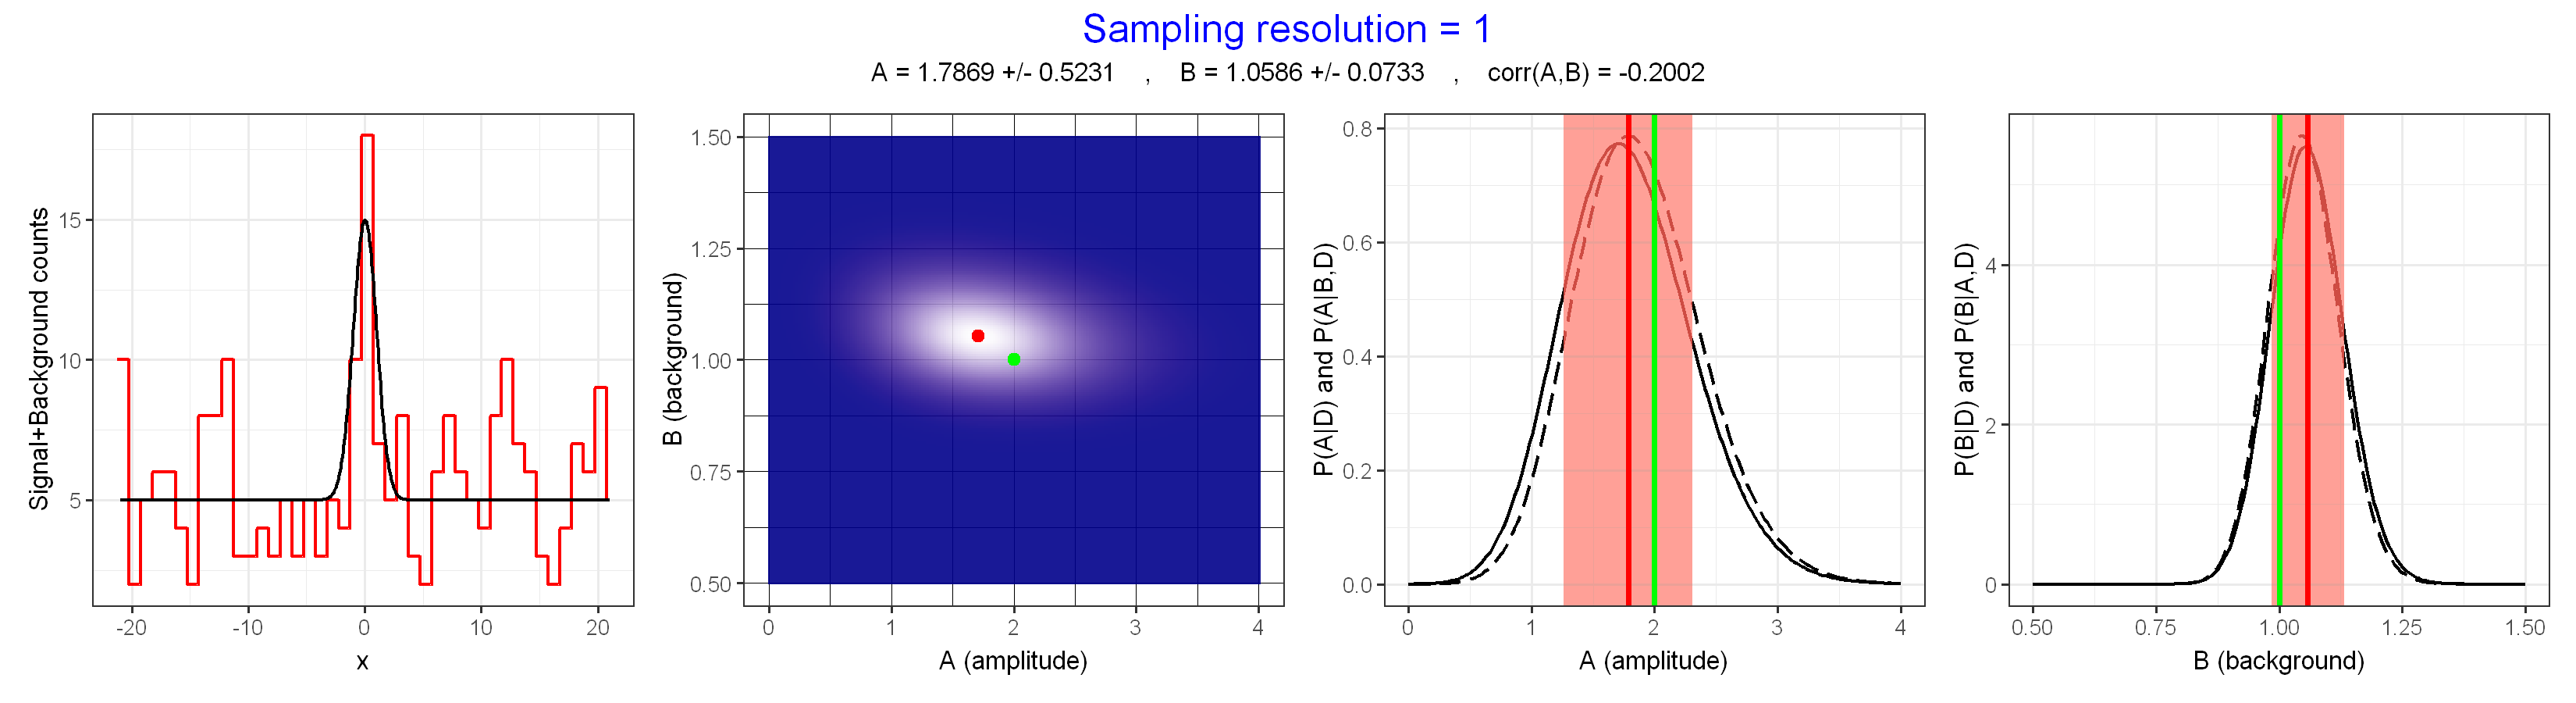

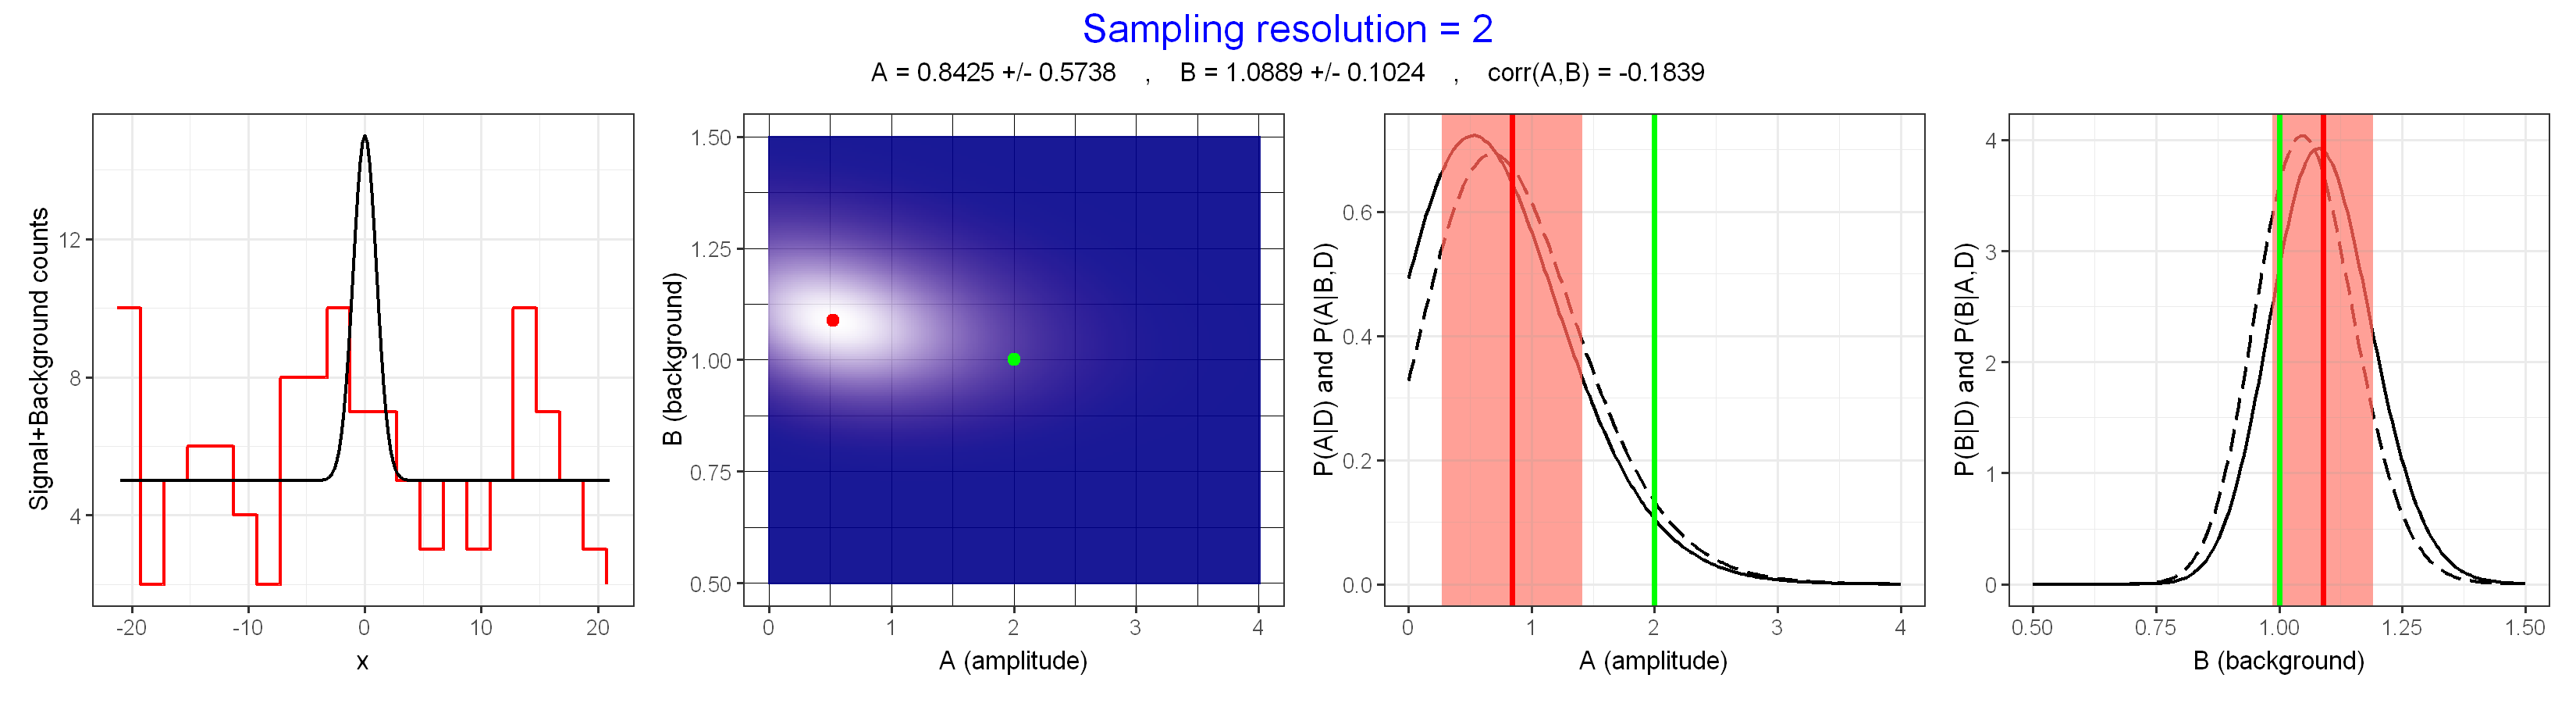

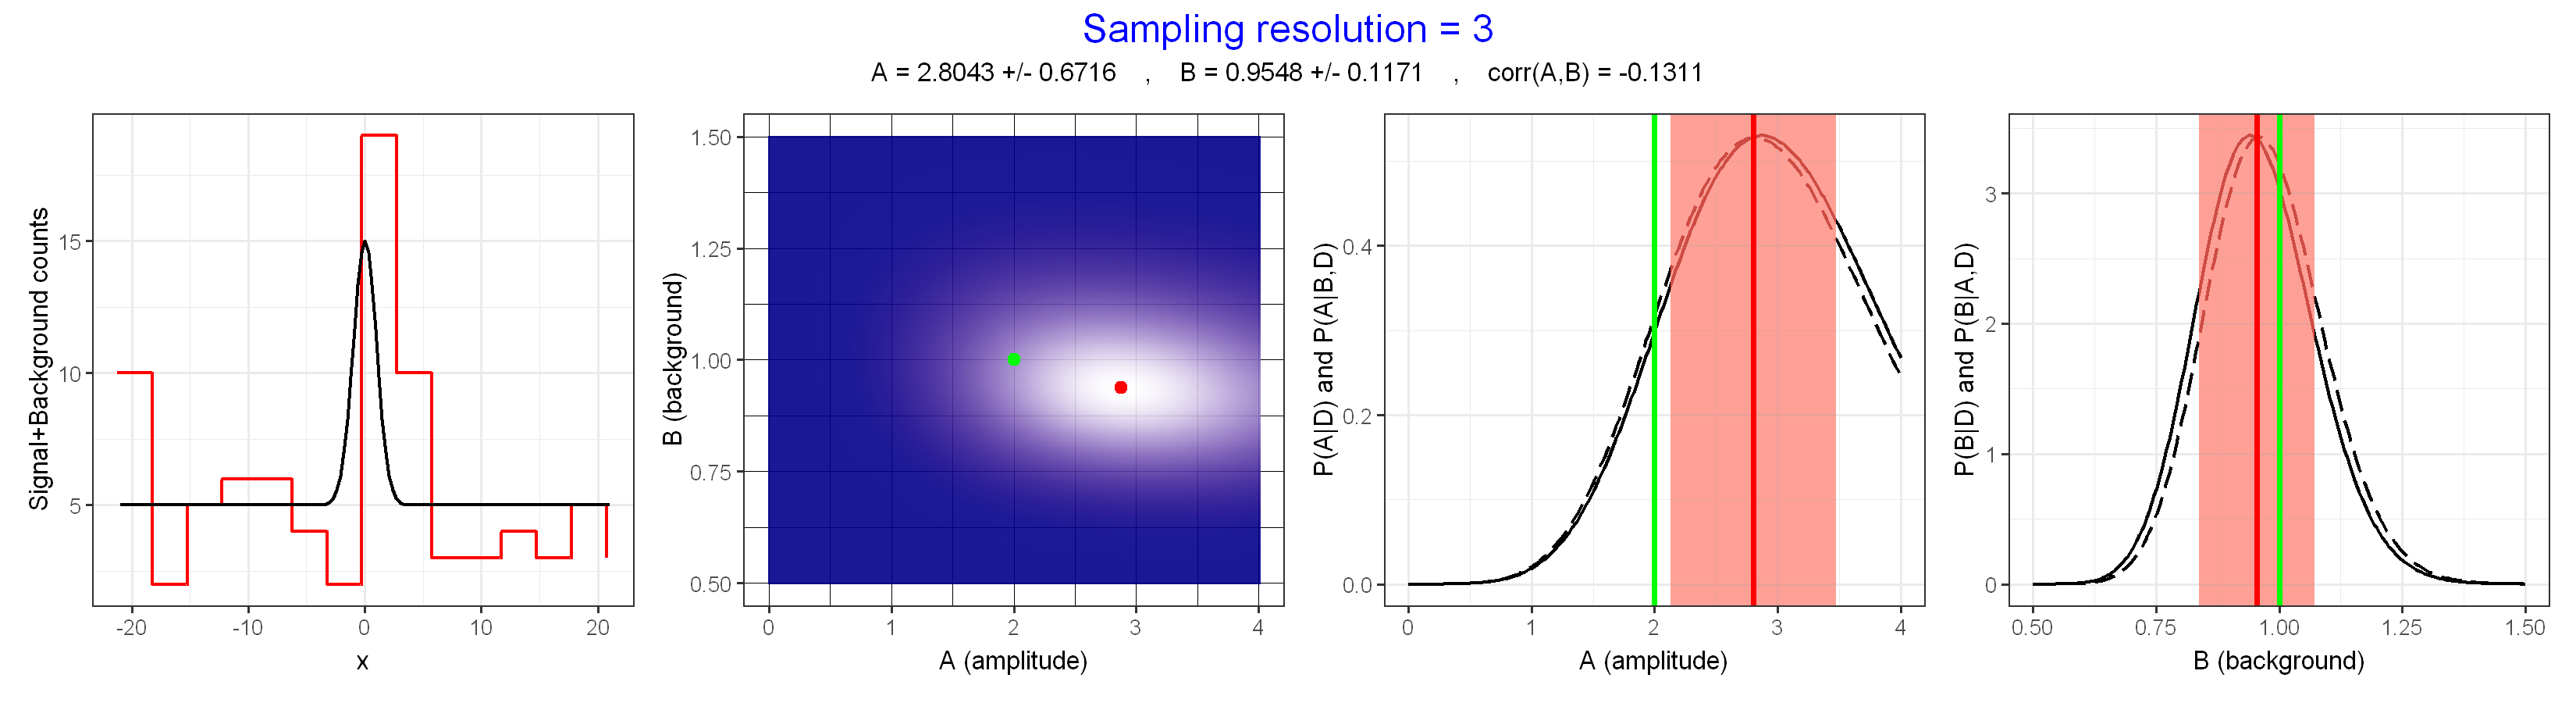

In [11]:
sampling_resolution <- c(.15, .25, .5, 1, 2, 3) # sampling resolutions to be analyzed
analyze.dependence(param_name='sampling_resolution', param_values=sampling_resolution, seed=205)

<a id='sec3.B'></a>
### **3.B** Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)
- #### check the effect on the results

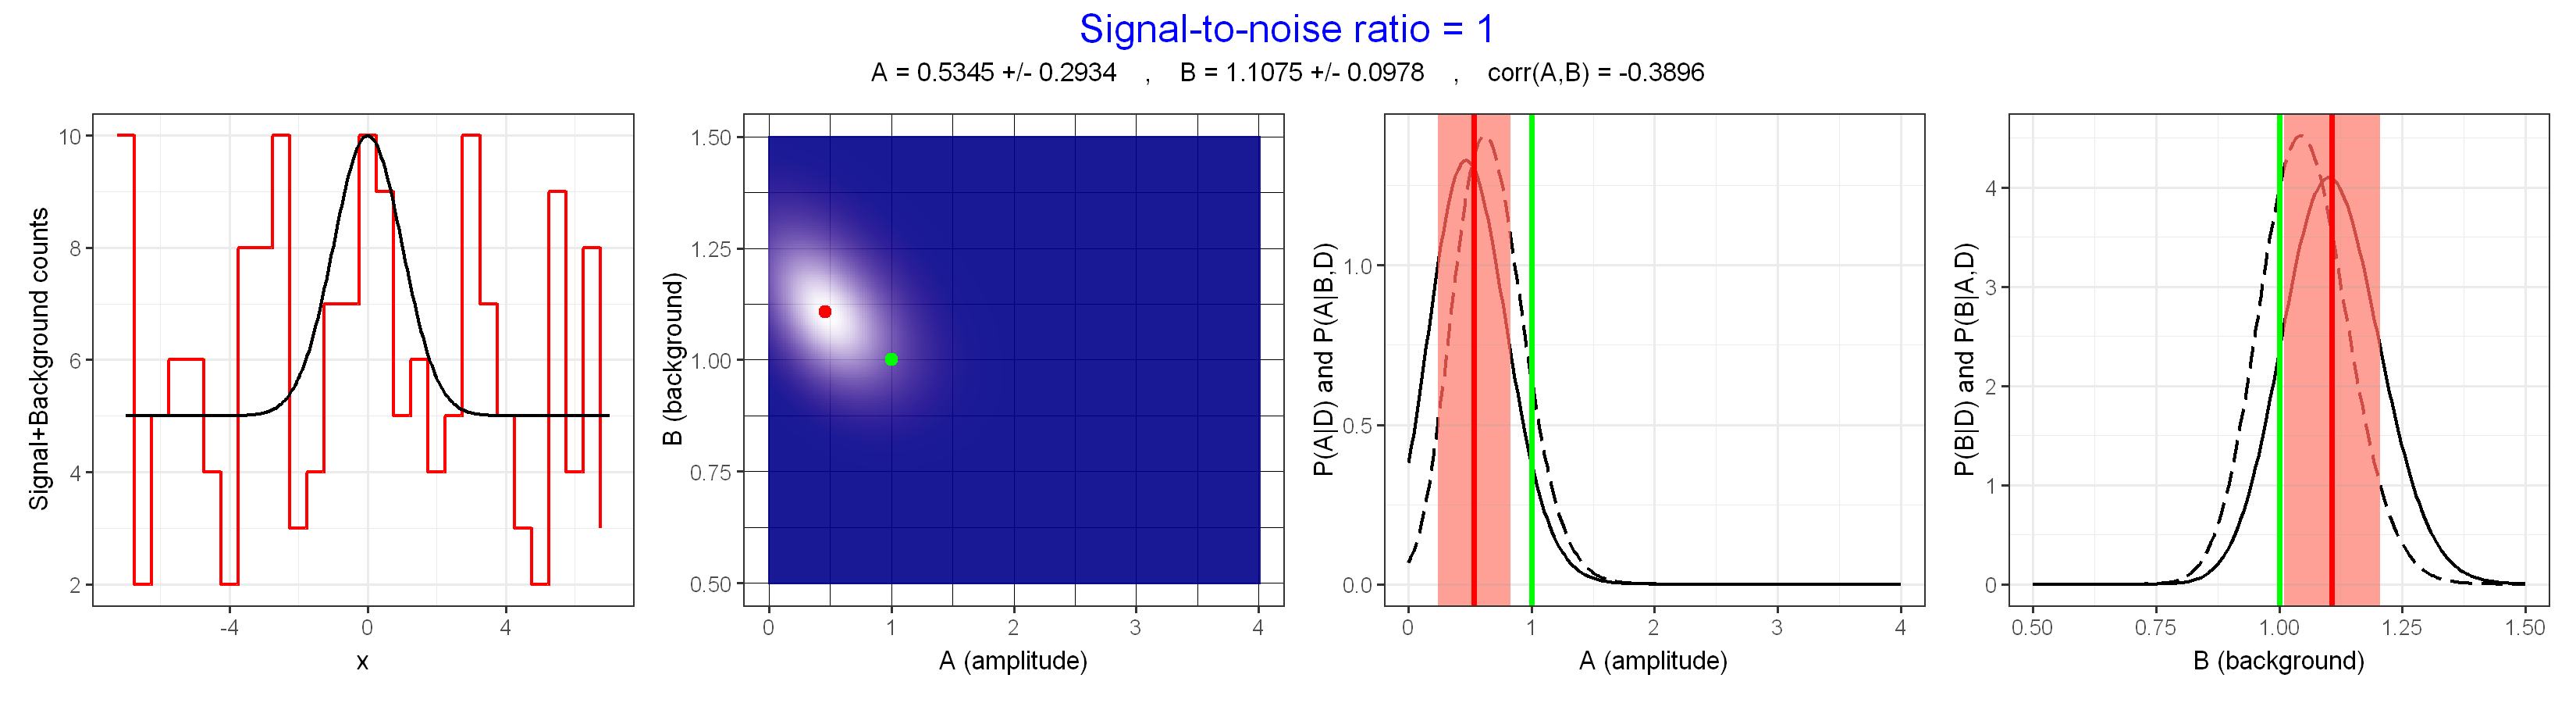

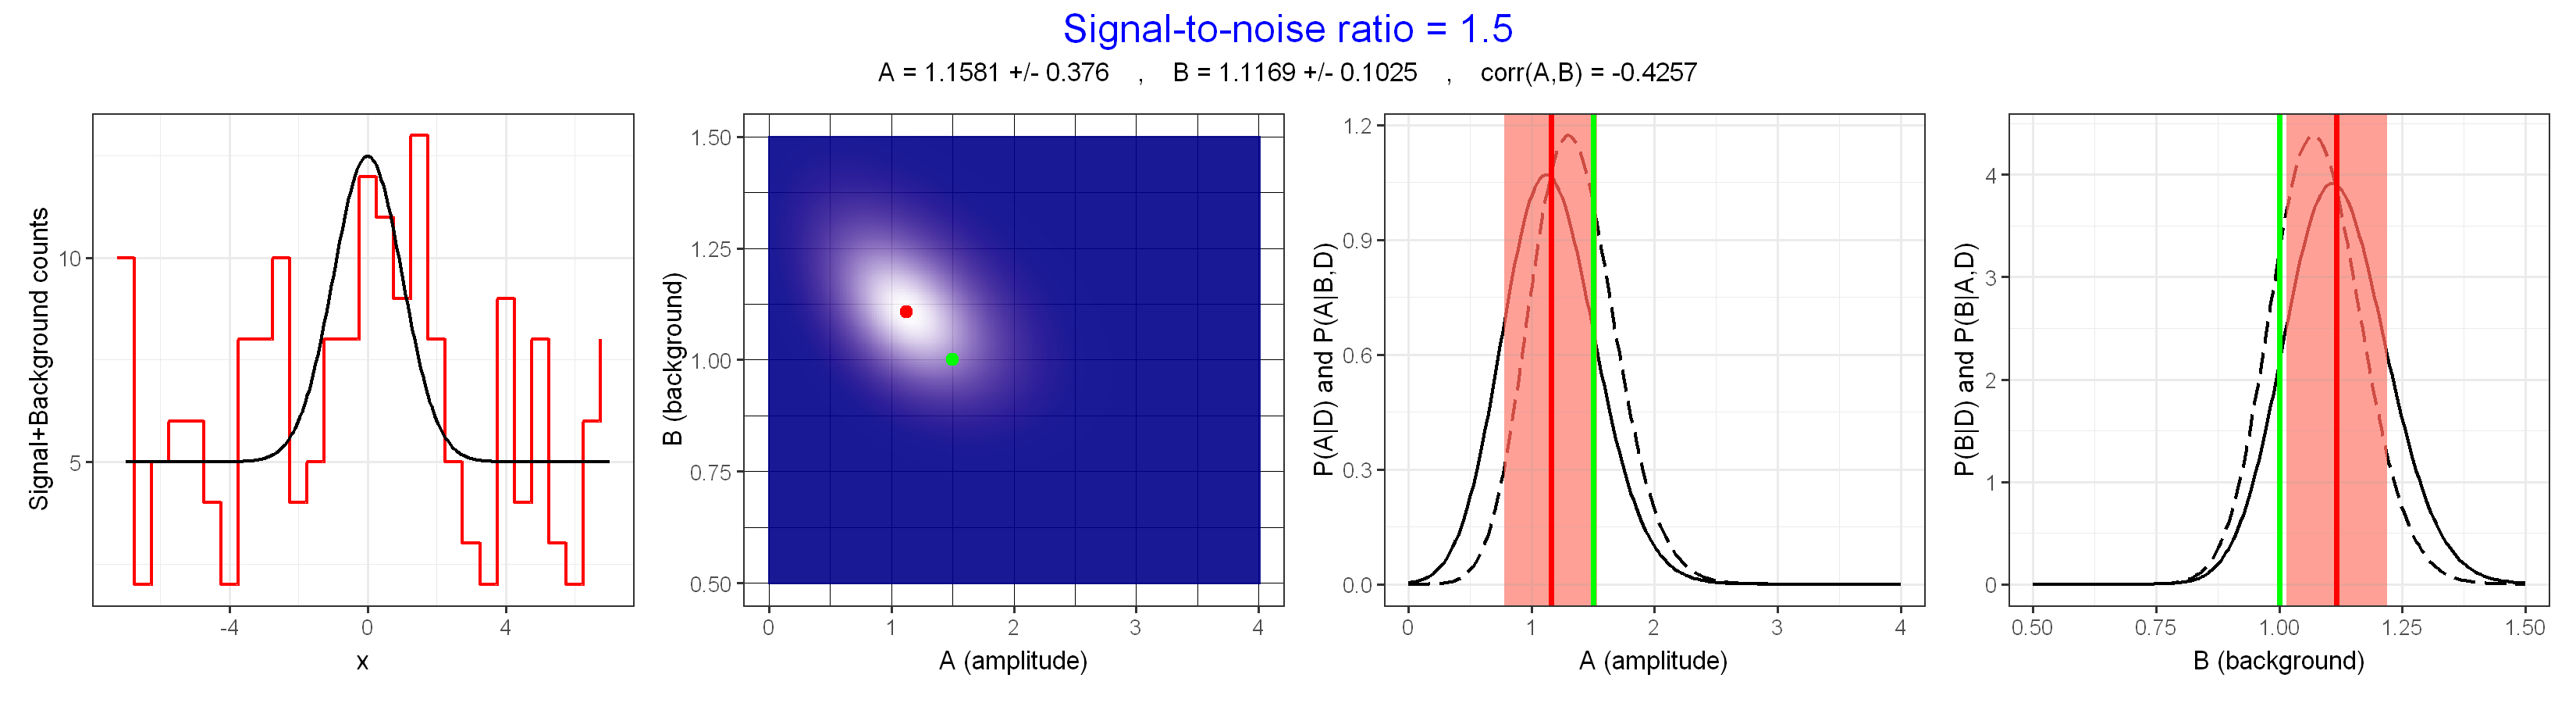

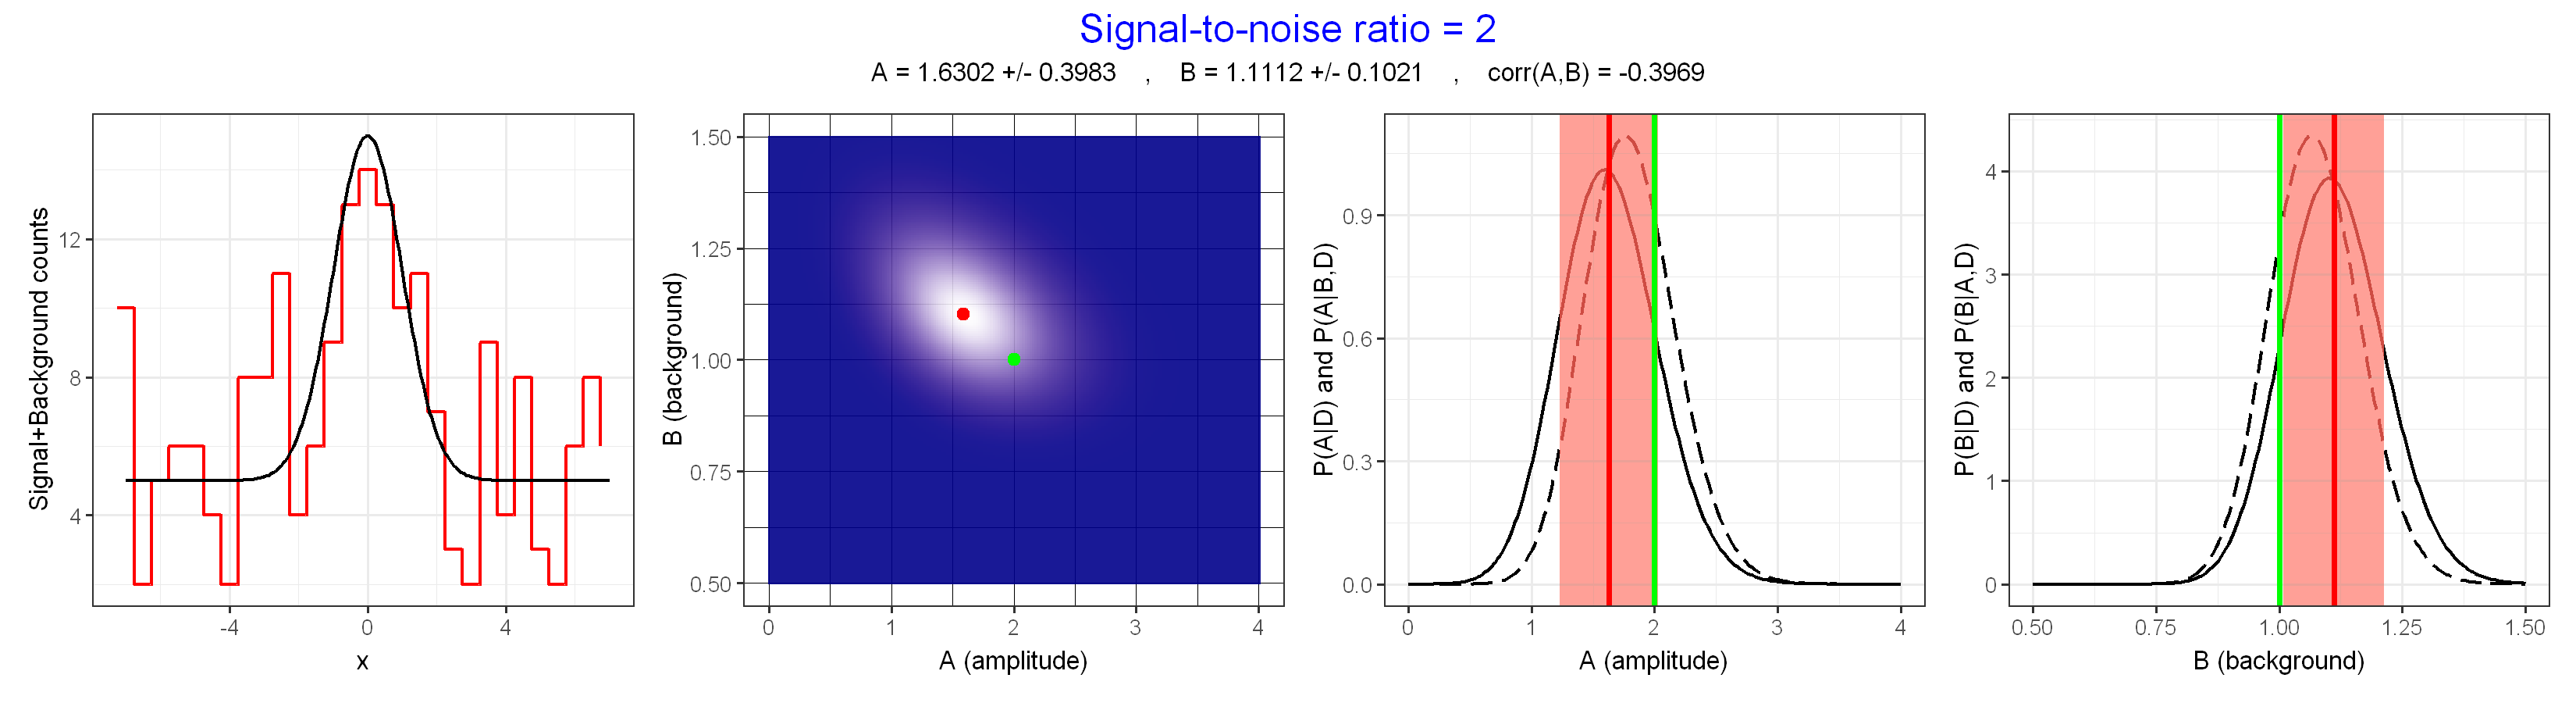

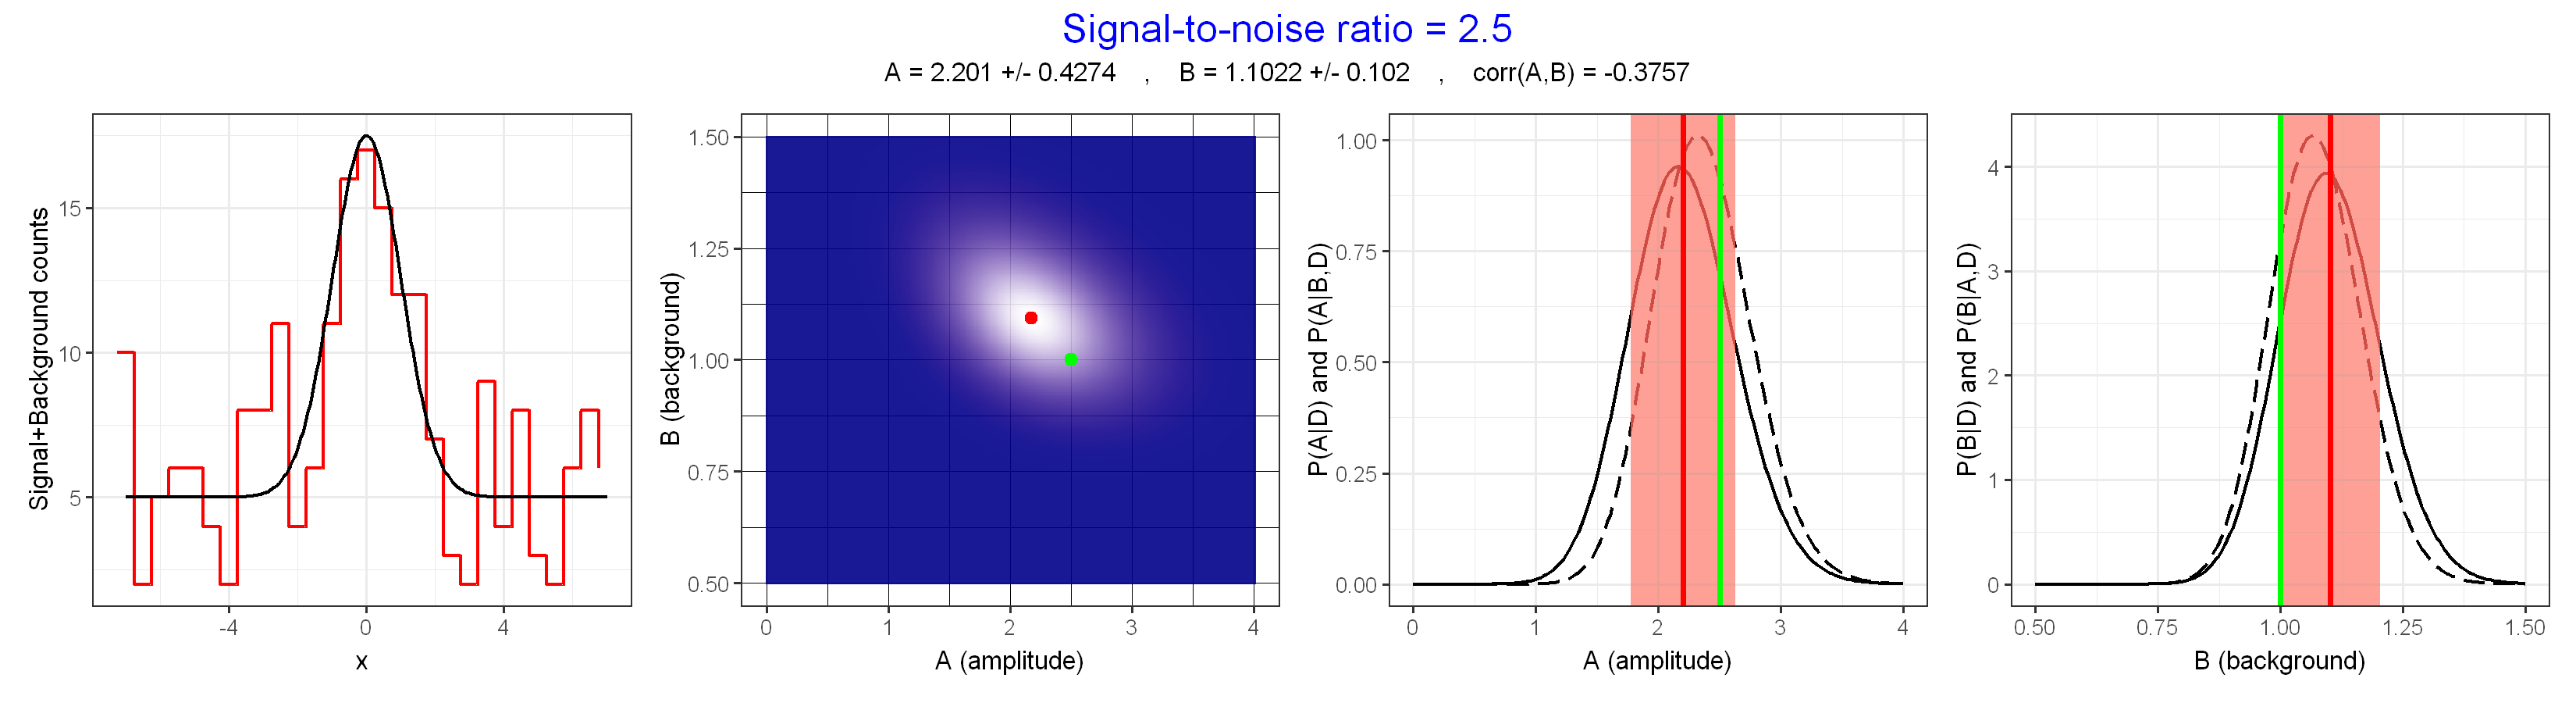

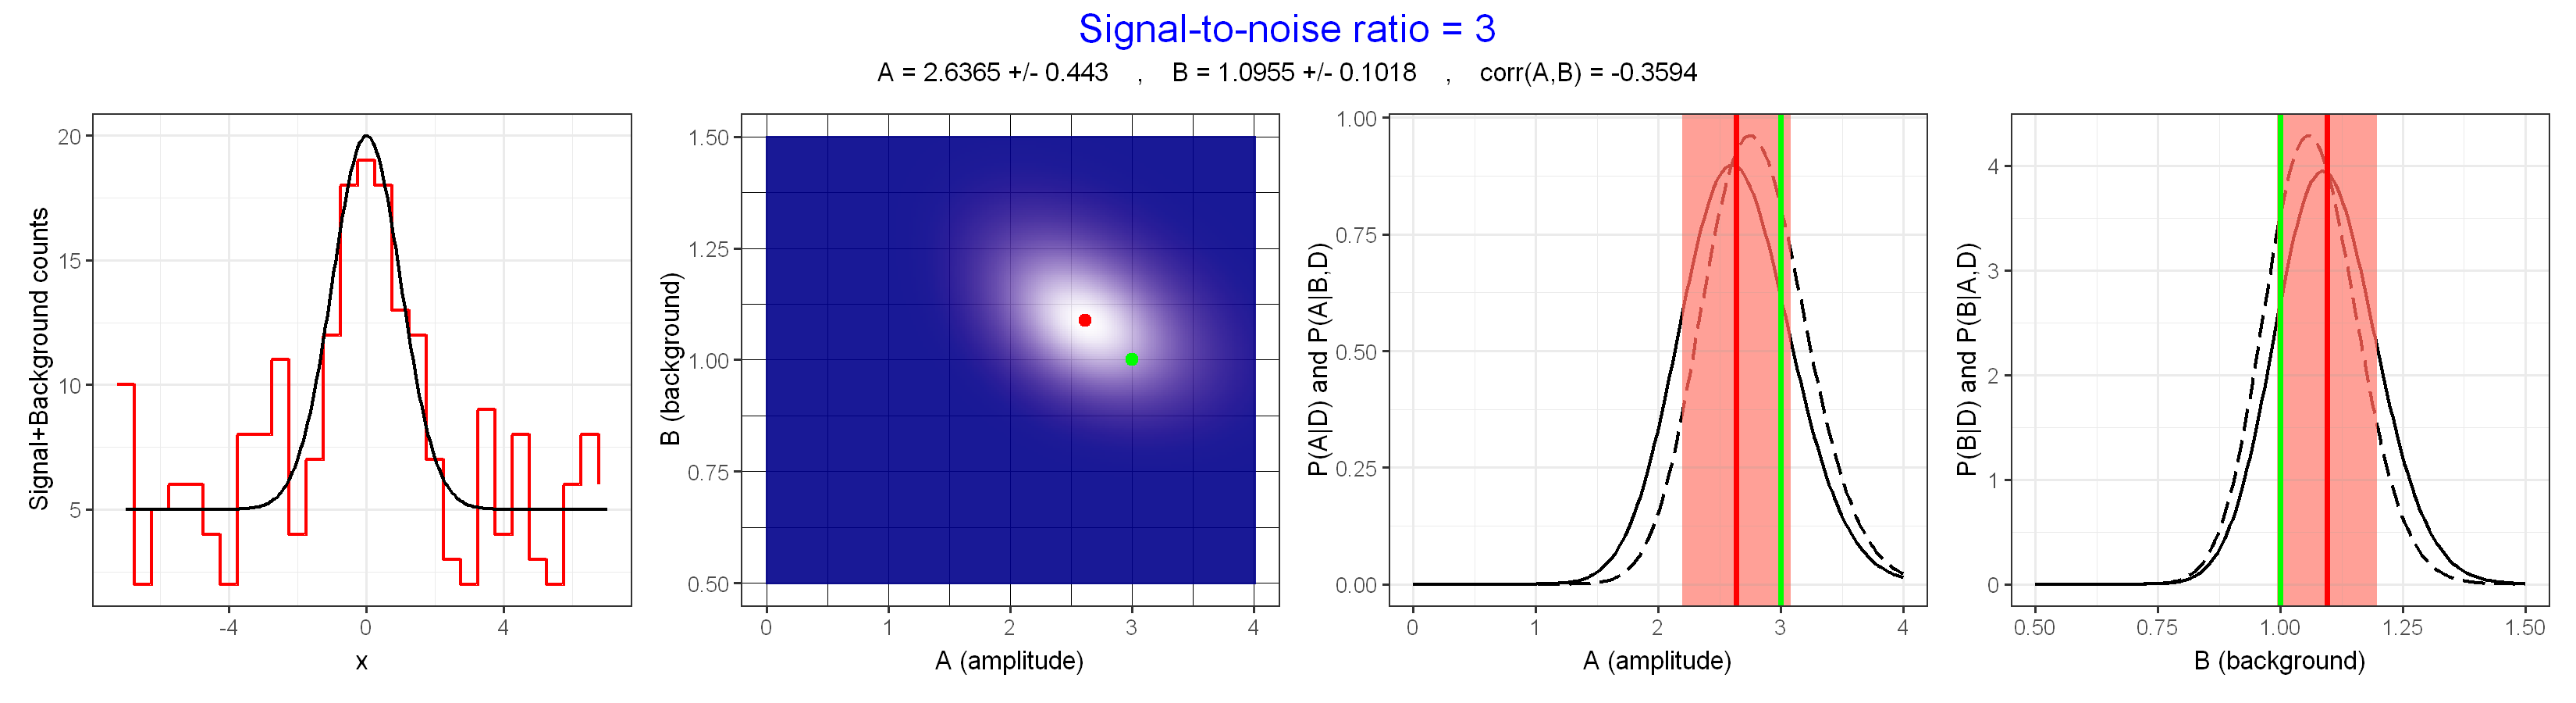

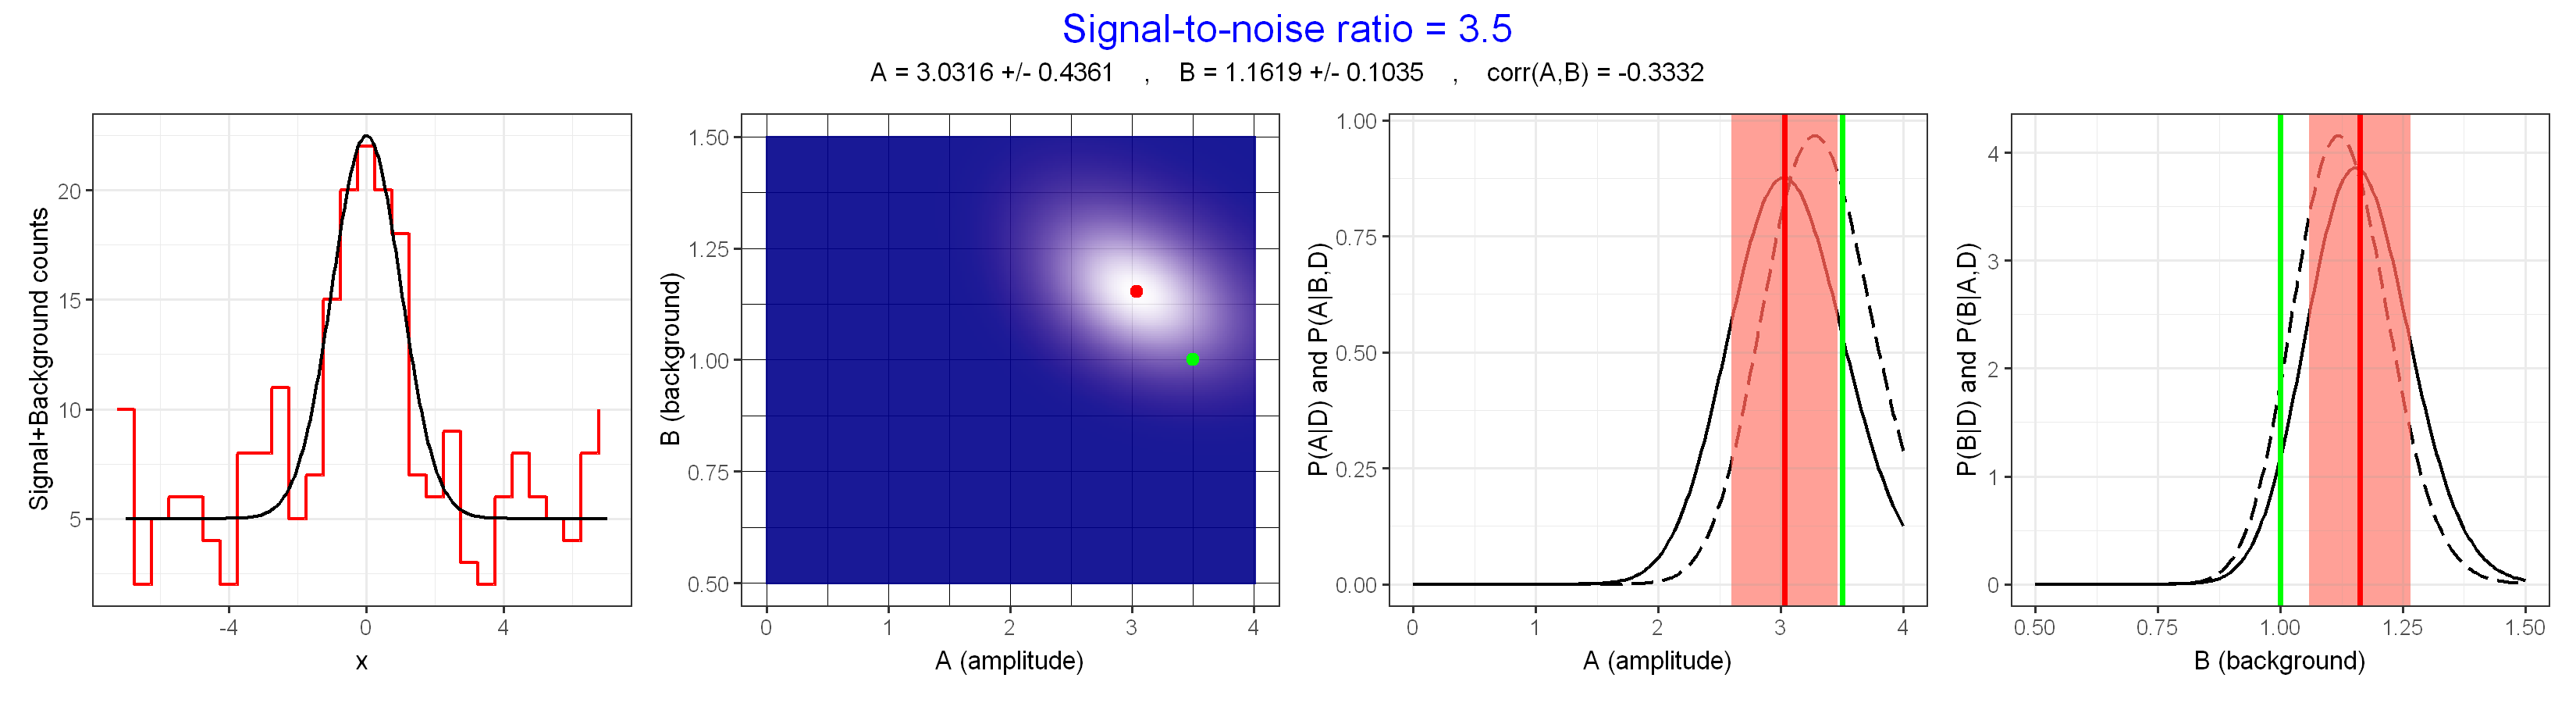

In [12]:
SNR <- c(1, 1.5, 2, 2.5, 3, 3.5) # signal-to-noise ratios to be analyzed
analyze.dependence(param_name='SNR', param_values=SNR, seed=205)